Import the required Libraries

In [199]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [200]:

# Load the Excel file
file_path = "Intentional Homicide Victims by counts and rates p.xls"
data = pd.read_excel(file_path, skiprows=2)

# Show the first 5 rows
data.head()

,Iso3_code,Region,Subregion,Country,Source,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE
0,ARM,Asia,Western Asia,Armenia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,35.0
1,CHE,Europe,Western Europe,Switzerland,CTS,by citizenship,National citizens,Male,Total,2013,Counts,28.0
2,COL,Americas,Latin America and the Caribbean,Colombia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,15053.0
3,CZE,Europe,Eastern Europe,Czechia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,69.0
4,DEU,Europe,Western Europe,Germany,CTS,by citizenship,National citizens,Male,Total,2013,Counts,455.0


Check Shape and Columns

In [201]:
# Check shape and column names
print("Shape of the dataset:", data.shape)
print("\nColumn names:")
print(data.columns)

Shape of the dataset: (118401, 12)

Column names:
Index(['Iso3_code', 'Region', 'Subregion', 'Country', 'Source', 'Dimension',
       'Category', 'Sex', 'Age', 'Year', 'Unit of measurement', 'VALUE'],
      dtype='object')


See summary statistics

In [202]:
# view summmary statistics for categorical columns
data.describe(include='object')

,Iso3_code,Region,Subregion,Country,Source,Dimension,Category,Sex,Age,Unit of measurement
count,118401,118397,118397,118397,118401,118401,118401,118401,118401,118401
unique,215,6,23,214,246,6,24,3,11,2
top,CAN,Europe,Latin America and the Caribbean,Canada,CTS,Total,Total,Male,Total,Counts
freq,2204,51221,38929,2204,82308,65286,65286,40025,77625,63347


Check Basic Info

In [203]:
# Check basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118401 entries, 0 to 118400
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Iso3_code            118401 non-null  object 
 1   Region               118397 non-null  object 
 2   Subregion            118397 non-null  object 
 3   Country              118397 non-null  object 
 4   Source               118401 non-null  object 
 5   Dimension            118401 non-null  object 
 6   Category             118401 non-null  object 
 7   Sex                  118401 non-null  object 
 8   Age                  118401 non-null  object 
 9   Year                 118401 non-null  int64  
 10  Unit of measurement  118401 non-null  object 
 11  VALUE                118401 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 10.8+ MB


Missing Values

In [204]:
# Check for missing values
data.isnull().sum()

Iso3_code              0
Region                 4
Subregion              4
Country                4
Source                 0
Dimension              0
Category               0
Sex                    0
Age                    0
Year                   0
Unit of measurement    0
VALUE                  0
dtype: int64

Quick Look at Key Columns

In [205]:
# Check unique values in important columns
print("Unique Units of Measurement:", data['Unit of measurement'].unique())
print("Unique Dimensions:", data['Dimension'].unique())
print("Year range:", data['Year'].min(), "to", data['Year'].max())

Unique Units of Measurement: ['Counts' 'Rate per 100,000 population']
Unique Dimensions: ['by citizenship' 'Total' 'by relationship to perpetrator'
 'by situational context' 'by mechanisms' 'by location']
Year range: 1990 to 2023


Remove Unnecessary Spaces

In [206]:
# Remove leading/trailing spaces in text columns
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()


Make a Copy of the Original Data

In [207]:
# Make a copy of the original dataset before cleaning
data_copy = data.copy()

# Confirm the copy was made
print("Copy created. Shape:", data_copy.shape)

Copy created. Shape: (118401, 12)


Handle Missing Values

In [208]:
# Check and handle missing values
# For now, we will just drop rows where 'Year' or 'VALUE' is missing
data_copy = data.dropna(subset=['Year', 'VALUE'])

Replace any 'nan' strings in Region with actual NaN

In [209]:
# Replace any 'nan' strings in Region with actual NaN
data_copy['Region'] = data_copy['Region'].replace('nan', pd.NA)

In [210]:
# Check the first 5 rows after cleaning
print(data_copy.head())

# Check data types again
print(data_copy.dtypes)

# Confirm no missing Year or VALUE
print("Missing Year:", data_copy['Year'].isnull().sum())
print("Missing VALUE:", data_copy['VALUE'].isnull().sum())

  Iso3_code    Region                        Subregion      Country Source  \
0       ARM      Asia                     Western Asia      Armenia    CTS   
1       CHE    Europe                   Western Europe  Switzerland    CTS   
2       COL  Americas  Latin America and the Caribbean     Colombia    CTS   
3       CZE    Europe                   Eastern Europe      Czechia    CTS   
4       DEU    Europe                   Western Europe      Germany    CTS   

        Dimension           Category   Sex    Age  Year Unit of measurement  \
0  by citizenship  National citizens  Male  Total  2013              Counts   
1  by citizenship  National citizens  Male  Total  2013              Counts   
2  by citizenship  National citizens  Male  Total  2013              Counts   
3  by citizenship  National citizens  Male  Total  2013              Counts   
4  by citizenship  National citizens  Male  Total  2013              Counts   

     VALUE  
0     35.0  
1     28.0  
2  15053.0  
3   

Convert data types for important columns

In [211]:
# - Use to_numeric with errors='coerce' to turn bad values into NaN instead of crashing
# - Use pandas nullable integer 'Int64' so Year can hold integers + NaN

before_dtypes = data_copy[['Year', 'VALUE']].dtypes
data_copy['Year'] = pd.to_numeric(data_copy['Year'], errors='coerce').astype('Int64')
data_copy['VALUE'] = pd.to_numeric(data_copy['VALUE'], errors='coerce').astype(float)
after_dtypes = data_copy[['Year', 'VALUE']].dtypes

print("Dtypes before:\n", before_dtypes)
print("\nDtypes after:\n", after_dtypes)
print("\nAny non-numeric in Year now? ->", data_copy['Year'].isna().sum(), "NaNs")
print("Any non-numeric in VALUE now? ->", data_copy['VALUE'].isna().sum(), "NaNs")

Dtypes before:
 Year       int64
VALUE    float64
dtype: object

Dtypes after:
 Year       Int64
VALUE    float64
dtype: object

Any non-numeric in Year now? -> 0 NaNs
Any non-numeric in VALUE now? -> 0 NaNs


In [212]:
# Remove leading/trailing spaces in all text (object) columns

obj_cols = data_copy.select_dtypes(include='object').columns.tolist()
print("Text columns to strip:", obj_cols)

for col in obj_cols:
    data_copy[col] = data_copy[col].str.strip()

print("Whitespace trimmed for object columns.")

Text columns to strip: ['Iso3_code', 'Region', 'Subregion', 'Country', 'Source', 'Dimension', 'Category', 'Sex', 'Age', 'Unit of measurement']
Whitespace trimmed for object columns.


Simple standardization of a couple of known labels

In [213]:

# We only do tiny, safe fixes that help with consistent filtering.

# Example: sometimes a literal string 'nan' can appear in Region; convert to real NaN
data_copy.loc[data_copy['Region'].str.lower() == 'nan', 'Region'] = pd.NA

# Ensure 'Total' is consistent in Sex/Age/Category where it appears
for col in ['Sex', 'Age', 'Category']:
    if col in data_copy.columns:
        data_copy[col] = data_copy[col].replace({'total': 'Total', 'TOTAL': 'Total'})

print("Basic standardization done (Region 'nan' -> NA; 'Total' label harmonized).")

Basic standardization done (Region 'nan' -> NA; 'Total' label harmonized).


In [214]:
#   1) For analysis we need Year and VALUE -> drop rows where either is missing.
#   2) Keep other missing values (they may be legitimate gaps in disaggregations).

before_rows = len(data_copy)
cleaned = data_copy.dropna(subset=['Year', 'VALUE']).copy()
after_rows = len(cleaned)

print(f"Rows before: {before_rows}  |  Rows after dropping missing Year/VALUE: {after_rows}")
print("Dropped:", before_rows - after_rows, "rows that lacked Year or VALUE.")

Rows before: 118401  |  Rows after dropping missing Year/VALUE: 118401
Dropped: 0 rows that lacked Year or VALUE.


Look for exact duplicate rows and remove them (if any)

In [215]:
# Look for exact duplicate rows and remove them (if any)
dups_before = cleaned.duplicated().sum()
print("Exact duplicate rows found:", dups_before)

cleaned = cleaned.drop_duplicates().reset_index(drop=True)
dups_after = cleaned.duplicated().sum()
print("Duplicates after drop:", dups_after)
print("Current shape:", cleaned.shape)

Exact duplicate rows found: 2815
Duplicates after drop: 0
Current shape: (115586, 12)


In [216]:
# Preview after cleaning

print("Columns:", list(cleaned.columns))
print("Year range:", cleaned['Year'].min(), "to", cleaned['Year'].max())
print("Units present:", cleaned['Unit of measurement'].dropna().unique())
print("Dimensions sample:", cleaned['Dimension'].dropna().unique()[:10])

print("\nPreview (first 5 rows):")
display(cleaned.head())

print("\nMissing values (top columns):")
display(cleaned.isnull().sum().sort_values(ascending=False).head(10))

Columns: ['Iso3_code', 'Region', 'Subregion', 'Country', 'Source', 'Dimension', 'Category', 'Sex', 'Age', 'Year', 'Unit of measurement', 'VALUE']
Year range: 1990 to 2023
Units present: ['Counts' 'Rate per 100,000 population']
Dimensions sample: ['by citizenship' 'Total' 'by relationship to perpetrator'
 'by situational context' 'by mechanisms' 'by location']

Preview (first 5 rows):


,Iso3_code,Region,Subregion,Country,Source,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE
0,ARM,Asia,Western Asia,Armenia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,35.0
1,CHE,Europe,Western Europe,Switzerland,CTS,by citizenship,National citizens,Male,Total,2013,Counts,28.0
2,COL,Americas,Latin America and the Caribbean,Colombia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,15053.0
3,CZE,Europe,Eastern Europe,Czechia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,69.0
4,DEU,Europe,Western Europe,Germany,CTS,by citizenship,National citizens,Male,Total,2013,Counts,455.0



Missing values (top columns):


Region       4
Subregion    4
Country      4
Iso3_code    0
Source       0
Dimension    0
Category     0
Sex          0
Age          0
Year         0
dtype: int64

Save the cleaned dataset 

In [217]:
csv_path = "cleaned_intentional_homicide.csv"
# xlsx_path = "cleaned_intentional_homicide.xlsx"  

cleaned.to_csv(csv_path, index=False, encoding="utf-8")
print("Saved CSV to:", csv_path)

try:
    cleaned.to_excel(xlsx_path, index=False)
    print("Saved Excel to:", xlsx_path)
except Exception as e:
    print("Excel save skipped (optional). Reason:", e)


Saved CSV to: cleaned_intentional_homicide.csv
Excel save skipped (optional). Reason: name 'xlsx_path' is not defined


### Import and load the cleaned dataset

In [218]:
cleaned_path = "cleaned_intentional_homicide.csv"  # saved in the cleaning notebook
cleaned = pd.read_csv(cleaned_path)

# Peek
cleaned.head(5)

,Iso3_code,Region,Subregion,Country,Source,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE
0,ARM,Asia,Western Asia,Armenia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,35.0
1,CHE,Europe,Western Europe,Switzerland,CTS,by citizenship,National citizens,Male,Total,2013,Counts,28.0
2,COL,Americas,Latin America and the Caribbean,Colombia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,15053.0
3,CZE,Europe,Eastern Europe,Czechia,CTS,by citizenship,National citizens,Male,Total,2013,Counts,69.0
4,DEU,Europe,Western Europe,Germany,CTS,by citizenship,National citizens,Male,Total,2013,Counts,455.0


###  for fair comparisons (Dimension=Total, Sex=Total, Age=Total)

In [219]:
if {'Dimension','Sex','Age'}.issubset(cleaned.columns):
    core = cleaned[
        (cleaned['Dimension'] == 'Total') &
        (cleaned['Sex'] == 'Total') &
        (cleaned['Age'] == 'Total')
    ].copy()
else:
    core = cleaned.copy()

print("Core shape:", core.shape)
core.head()

Core shape: (12682, 12)


,Iso3_code,Region,Subregion,Country,Source,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE
1457,ABW,Americas,Latin America and the Caribbean,Aruba,MD,Total,Total,Total,Total,1990,Counts,0.0
1458,AIA,Americas,Latin America and the Caribbean,Anguilla,WHO/NSO/SDG/PAHO,Total,Total,Total,Total,1990,Counts,0.0
1459,ARM,Asia,Western Asia,Armenia,UNSDC/TransMonEE/CTS/Covid-19/SDG,Total,Total,Total,Total,1990,Counts,178.0
1460,ATG,Americas,Latin America and the Caribbean,Antigua and Barbuda,MD/PAHO/OAS/CTS,Total,Total,Total,Total,1990,Counts,1.0
1461,AUS,Oceania,Australia and New Zealand,Australia,MD/Eurostat/GSH 2019 Revision/CTS,Total,Total,Total,Total,1990,Counts,374.0


### Question 1: Which countries have the highest and lowest homicide rates (per 100,000 population) in the most recent year available?

### Find the most recent year (for rates)

In [220]:
# Cell A3 (Most Recent Year): choose the latest year that has Rate per 100,000 population
rates = core[core['Unit of measurement'] == 'Rate per 100,000 population'].copy()

latest_year = int(rates['Year'].max())
countries_reporting = rates.loc[rates['Year'] == latest_year, 'Country'].nunique()

print("Most recent year (for rates):", latest_year)
print("Countries reporting in that year:", countries_reporting)

Most recent year (for rates): 2023
Countries reporting in that year: 49


Top/Bottom 10 homicide rates in best_year

In [221]:
# Highest and lowest homicide rates in the best comparison year
# Filter to that year and drop 'World' if present
r_yr = rates[(rates['Year'] == latest_year) & (rates['Country'] != 'World')].copy()

# Keep only columns we need
r_yr = r_yr[['Country', 'Region', 'VALUE']].rename(columns={'VALUE':'Rate_per_100k'})

# Top 10 and Bottom 10
top10 = r_yr.sort_values('Rate_per_100k', ascending=False).head(10)
bot10 = r_yr.sort_values('Rate_per_100k', ascending=True).head(10)

print("Top 10 countries by rate (per 100,000) in", latest_year)
display(top10)

print("\nBottom 10 countries by rate (per 100,000) in", latest_year)
display(bot10)

Top 10 countries by rate (per 100,000) in 2023


,Country,Region,Rate_per_100k
65669,Jamaica,Americas,49.299489
65659,Ecuador,Americas,45.722815
65666,Haiti,Americas,41.151809
65665,Honduras,Americas,31.442432
65676,Mexico,Americas,24.858995
65655,Costa Rica,Americas,17.745480
65686,Puerto Rico,Americas,14.312054
65652,Bermuda,Americas,6.182571
65680,Mongolia,Asia,5.915035
65694,United States of America,Americas,5.763408



Bottom 10 countries by rate (per 100,000) in 2023


,Country,Region,Rate_per_100k
65695,Holy See,Europe,0.000000
115171,Slovakia,Europe,0.000000
115169,Latvia,Europe,0.000000
115168,Jordan,Asia,0.000000
115167,Hungary,Europe,0.010324
115166,Bolivia (Plurinational State of),Americas,0.024501
115170,Puerto Rico,Americas,0.061690
65688,Singapore,Asia,0.069095
114523,Singapore,Asia,0.120917
65683,Oman,Asia,0.138634


Plot Top 10 rates (beginner bar chart)

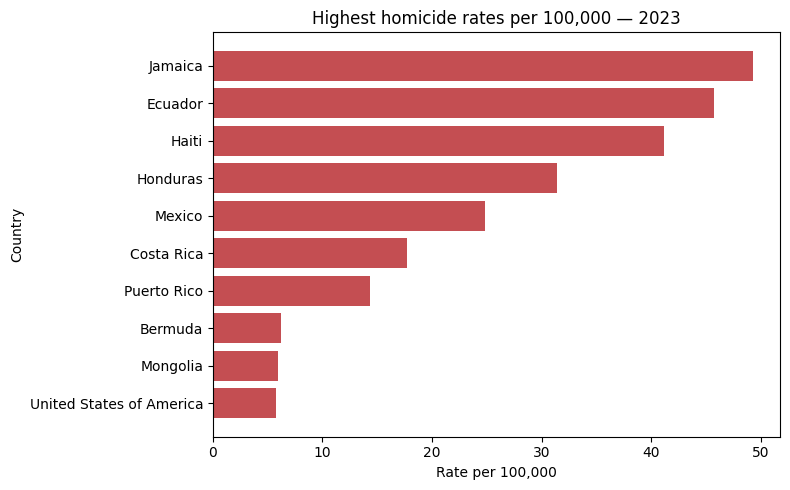

In [222]:
# Bar chart for top 10 rates
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(top10['Country'][::-1], top10['Rate_per_100k'][::-1], color='#C44E52')
plt.title(f'Highest homicide rates per 100,000 — {latest_year}')
plt.xlabel('Rate per 100,000')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 2. How has the global homicide rate (or total counts) changed over time for the 'World'
region?

Build World time series for Rate and Counts

In [223]:
# Separate tables for Rate per 100k and Counts.

world_mask = (
    (cleaned['Country'] == 'World') &
    (cleaned['Dimension'] == 'Total') &
    (cleaned['Sex'] == 'Total') &
    (cleaned['Age'] == 'Total')
)

world_rates = (
    cleaned[world_mask & (cleaned['Unit of measurement'] == 'Rate per 100,000 population')]
    .sort_values('Year')[['Year', 'VALUE']]
    .rename(columns={'VALUE': 'Rate_per_100k'})
)

world_counts = (
    cleaned[world_mask & (cleaned['Unit of measurement'] == 'Counts')]
    .sort_values('Year')[['Year', 'VALUE']]
    .rename(columns={'VALUE': 'Counts'})
)

print("World rates shape:", world_rates.shape)
print("World counts shape:", world_counts.shape)
world_rates.head(), world_counts.head()

World rates shape: (23, 2)
World counts shape: (23, 2)


(        Year  Rate_per_100k
 115287  2000       6.929163
 115288  2001       7.018858
 115289  2002       6.980681
 115290  2003       6.797805
 115291  2004       6.574930,
        Year         Counts
 61151  2000  427648.691007
 61152  2001  439027.768103
 61153  2002  442420.839722
 61154  2003  436448.193050
 61155  2004  427595.534539)

### Merge into one table for easy plotting

In [224]:
# Produce a single table 'world_trend' with columns: Year, Rate_per_100k, Counts.

world_trend = pd.merge(world_rates, world_counts, on='Year', how='outer').sort_values('Year')
world_trend.reset_index(drop=True, inplace=True)

print("World trend (first 10 rows):")
world_trend.head(10)

World trend (first 10 rows):


,Year,Rate_per_100k,Counts
0,2000,6.929163,427648.691007
1,2001,7.018858,439027.768103
2,2002,6.980681,442420.839722
3,2003,6.797805,436448.193050
4,2004,6.574930,427595.534539
5,2005,6.365831,419321.230098
6,2006,6.247081,416773.950367
7,2007,6.074038,410443.563896
8,2008,6.069317,415413.324532
9,2009,6.115314,423958.334789


### Plot both series on the same chart (two y-axes)

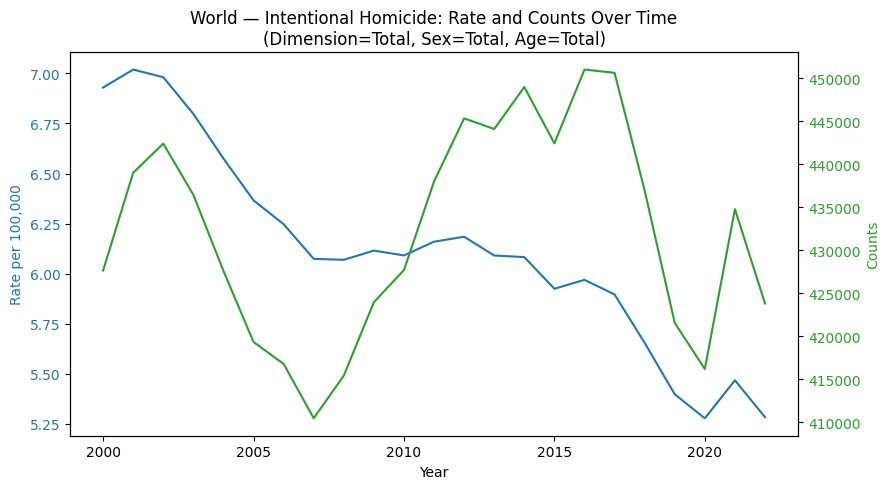

In [225]:
# Simple, readable figure with separate y-axes for rate and counts.

plt.figure(figsize=(9,5))

ax1 = plt.gca()
ax1.plot(world_trend['Year'], world_trend['Rate_per_100k'], color='#1f77b4', label='Rate per 100,000')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rate per 100,000', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

ax2 = ax1.twinx()
ax2.plot(world_trend['Year'], world_trend['Counts'], color='#2ca02c', label='Counts')
ax2.set_ylabel('Counts', color='#2ca02c')
ax2.tick_params(axis='y', labelcolor='#2ca02c')

plt.title("World — Intentional Homicide: Rate and Counts Over Time\n(Dimension=Total, Sex=Total, Age=Total)")
plt.tight_layout()
plt.show()

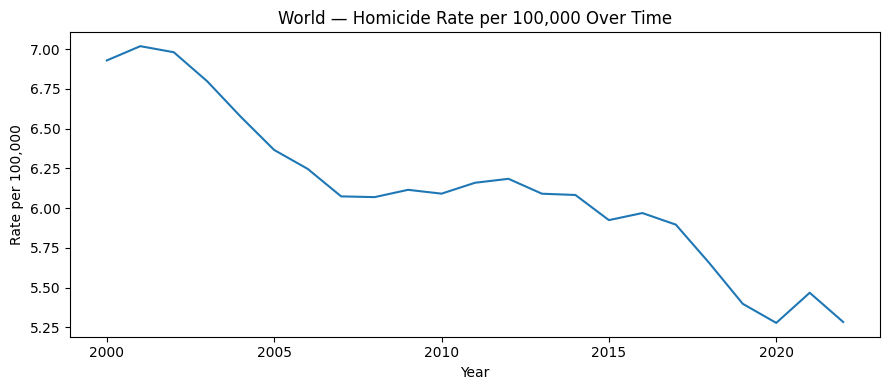

In [226]:
# Rate-only trend (single y-axis)

plt.figure(figsize=(9,4))
plt.plot(world_trend['Year'], world_trend['Rate_per_100k'], color='#1f77b4')
plt.title('World — Homicide Rate per 100,000 Over Time')
plt.xlabel('Year')
plt.ylabel('Rate per 100,000')
plt.tight_layout()
plt.show()

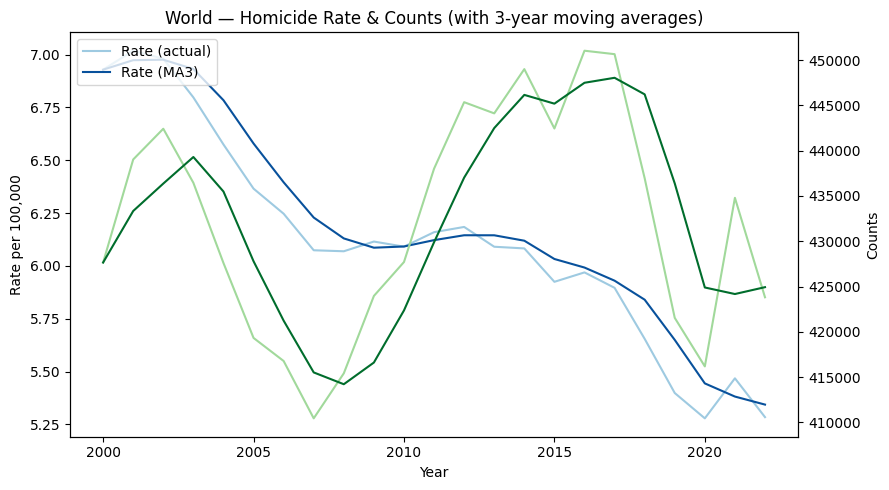

In [227]:
# 3-year moving averages to smooth short-term bumps

trend_ma = world_trend.copy()
trend_ma['Rate_MA3']   = trend_ma['Rate_per_100k'].rolling(window=3, min_periods=1).mean()
trend_ma['Counts_MA3'] = trend_ma['Counts'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(9,5))

ax1 = plt.gca()
ax1.plot(trend_ma['Year'], trend_ma['Rate_per_100k'], color='#9ecae1', label='Rate (actual)')
ax1.plot(trend_ma['Year'], trend_ma['Rate_MA3'],   color='#08519c', label='Rate (MA3)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rate per 100,000')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(trend_ma['Year'], trend_ma['Counts'],     color='#a1d99b', label='Counts (actual)')
ax2.plot(trend_ma['Year'], trend_ma['Counts_MA3'], color='#006d2c', label='Counts (MA3)')
ax2.set_ylabel('Counts')

plt.title('World — Homicide Rate & Counts (with 3-year moving averages)')
plt.tight_layout()
plt.show()

In [228]:
# Quick summary (first year vs last year)

first_year = int(world_trend['Year'].min())
last_year  = int(world_trend['Year'].max())

first_row = world_trend.loc[world_trend['Year'] == first_year, ['Rate_per_100k','Counts']].iloc[0]
last_row  = world_trend.loc[world_trend['Year'] == last_year,  ['Rate_per_100k','Counts']].iloc[0]

print(f"Coverage: {first_year} → {last_year}")
print(f"First year:  Rate={first_row['Rate_per_100k']:.2f}, Counts={int(first_row['Counts']) if pd.notna(first_row['Counts']) else 'NA'}")
print(f"Last year:   Rate={last_row['Rate_per_100k']:.2f}, Counts={int(last_row['Counts']) if pd.notna(last_row['Counts']) else 'NA'}")

Coverage: 2000 → 2022
First year:  Rate=6.93, Counts=427648
Last year:   Rate=5.28, Counts=423810


Interpretation: Globally, the homicide rate per 100,000 has [describe direction] from [first_year] (~x per 100k) to [last_year] (~y per 100k). In absolute counts, the worldwide total has [describe direction], reflecting changes in both population size and lethal‑violence patterns over time.

### Question 3. How do homicide rates compare across the five major regions (Americas, Europe, Asia, Africa, Oceania)?

Split into Counts and Rates (country‑year level)

In [229]:
# Create simple country-year tables for counts and rates
cols_keep = ['Region', 'Country', 'Year', 'VALUE']

counts = core[core['Unit of measurement'] == 'Counts'][cols_keep].copy()
counts = counts.rename(columns={'VALUE': 'COUNT'})

rates = core[core['Unit of measurement'] == 'Rate per 100,000 population'][cols_keep].copy()
rates = rates.rename(columns={'VALUE': 'RATE'})

print("Counts shape:", counts.shape, "| Rates shape:", rates.shape)
counts.head(), rates.head()

Counts shape: (6344, 4) | Rates shape: (6338, 4)


(        Region              Country  Year  COUNT
 1457  Americas                Aruba  1990    0.0
 1458  Americas             Anguilla  1990    0.0
 1459      Asia              Armenia  1990  178.0
 1460  Americas  Antigua and Barbuda  1990    1.0
 1461   Oceania            Australia  1990  374.0,
          Region              Country  Year      RATE
 61450  Americas                Aruba  1990  0.000000
 61451  Americas             Anguilla  1990  0.000000
 61452      Asia              Armenia  1990  5.011081
 61453  Americas  Antigua and Barbuda  1990  1.585628
 61454   Oceania            Australia  1990  2.183776)

Keep only the most comparable slice

In [230]:
# Dimension=Total, Sex=Total, Age=Total
core = cleaned.copy()
if {'Dimension', 'Sex', 'Age'}.issubset(core.columns):
    core = core[
        (core['Dimension'] == 'Total') &
        (core['Sex'] == 'Total') &
        (core['Age'] == 'Total')
    ].copy()

# Keep only the five standard regions
valid_regions = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
core = core[core['Region'].isin(valid_regions)].copy()

print("Core shape:", core.shape)
core.head()

Core shape: (12632, 12)


,Iso3_code,Region,Subregion,Country,Source,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE
1457,ABW,Americas,Latin America and the Caribbean,Aruba,MD,Total,Total,Total,Total,1990,Counts,0.0
1458,AIA,Americas,Latin America and the Caribbean,Anguilla,WHO/NSO/SDG/PAHO,Total,Total,Total,Total,1990,Counts,0.0
1459,ARM,Asia,Western Asia,Armenia,UNSDC/TransMonEE/CTS/Covid-19/SDG,Total,Total,Total,Total,1990,Counts,178.0
1460,ATG,Americas,Latin America and the Caribbean,Antigua and Barbuda,MD/PAHO/OAS/CTS,Total,Total,Total,Total,1990,Counts,1.0
1461,AUS,Oceania,Australia and New Zealand,Australia,MD/Eurostat/GSH 2019 Revision/CTS,Total,Total,Total,Total,1990,Counts,374.0


Merge counts & rates, compute implied population

In [231]:
# Merge counts and rates to back out population
# POP = COUNT / (RATE / 100000), guarding against divide-by-zero or missing values
m = pd.merge(counts, rates, on=['Region', 'Country', 'Year'], how='inner')

# Avoid division by zero or missing
m = m.dropna(subset=['COUNT', 'RATE'])
m = m[m['RATE'] > 0]

m['POP'] = m['COUNT'] / (m['RATE'] / 100000.0)

print("Merged shape:", m.shape)
m.head()

Merged shape: (9529, 6)


,Region,Country,Year,COUNT,RATE,POP
2,Asia,Armenia,1990,178.0,5.011081,3552127.5
3,Americas,Antigua and Barbuda,1990,1.0,1.585628,63066.5
4,Oceania,Australia,1990,374.0,2.183776,17126298.0
5,Europe,Austria,1990,89.0,1.158911,7679624.5
6,Asia,Azerbaijan,1990,329.0,4.549806,7231077.0


Compute population‑weighted regional rates per year

In [232]:
# Regional rate per year = 100k * SUM(COUNT) / SUM(POP)
reg = m.groupby(['Region', 'Year'], as_index=False).agg({'COUNT':'sum', 'POP':'sum'})
reg['REG_RATE_per_100k'] = 100000.0 * reg['COUNT'] / reg['POP']

print("Regional time series (first 10 rows):")
reg.head(10)

Regional time series (first 10 rows):


,Region,Year,COUNT,POP,REG_RATE_per_100k
0,Africa,1990,2205.0,104589747.5,2.108237
1,Africa,1991,1851.0,96788967.0,1.912408
2,Africa,1992,2033.0,98932279.5,2.054941
3,Africa,1993,2005.0,101040159.5,1.984359
4,Africa,1994,28231.0,147045020.0,19.198882
5,Africa,1995,31095.0,98352710.0,31.615804
6,Africa,1996,29946.0,100118816.0,29.910462
7,Africa,1997,29843.0,129187871.5,23.100466
8,Africa,1998,27158.0,87275439.5,31.117575
9,Africa,1999,24732.0,88510561.0,27.942428


Plot regional rates over time (lines)

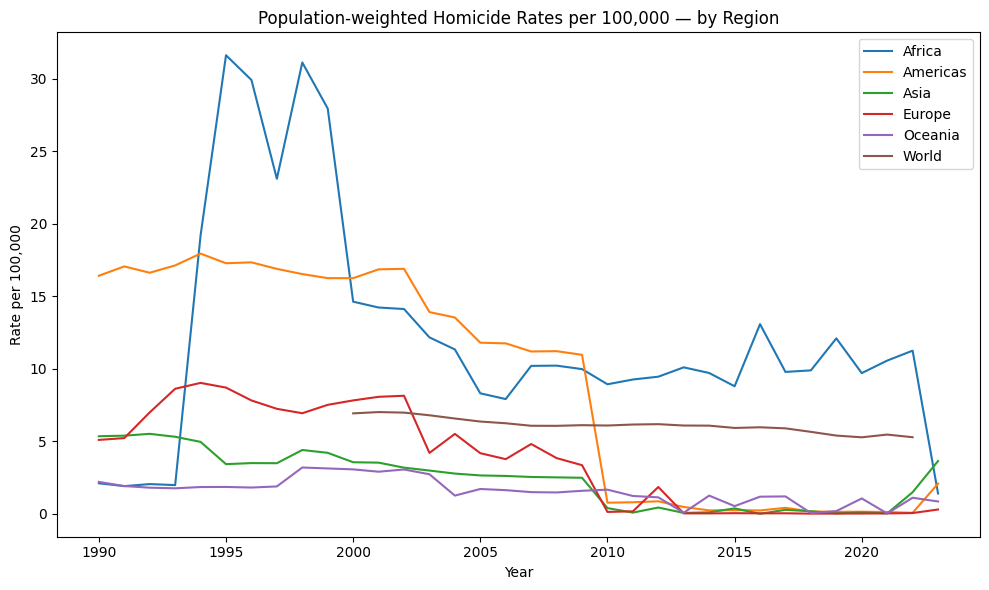

In [233]:
# Multi-line plot: regional rates over time
plt.figure(figsize=(10,6))

for region, sub in reg.groupby('Region'):
    plt.plot(sub['Year'], sub['REG_RATE_per_100k'], label=region)

plt.title('Population-weighted Homicide Rates per 100,000 — by Region')
plt.xlabel('Year')
plt.ylabel('Rate per 100,000')
plt.legend()
plt.tight_layout()
plt.show()

Compare regions in the latest common year

In [234]:
# Find the latest year available across ALL five regions
yrs_by_region = reg.groupby('Region')['Year'].apply(set)

# 2) Compute the intersection of years
common_years = set.intersection(*yrs_by_region.tolist())
latest_common_year = max(common_years) if len(common_years) > 0 else int(reg['Year'].min())

print("Latest common year across all regions:", latest_common_year)

# Slice to that year and sort for a simple bar chart
bar_df = reg[reg['Year'] == latest_common_year][['Region', 'REG_RATE_per_100k']].copy()
bar_df = bar_df.sort_values('REG_RATE_per_100k', ascending=False)
bar_df

Latest common year across all regions: 2022


,Region,REG_RATE_per_100k
32,Africa,11.252454
192,World,5.284008
100,Asia,1.491245
168,Oceania,1.111995
66,Americas,0.073848
134,Europe,0.057558


Bar chart comparing regional rates in the latest common year

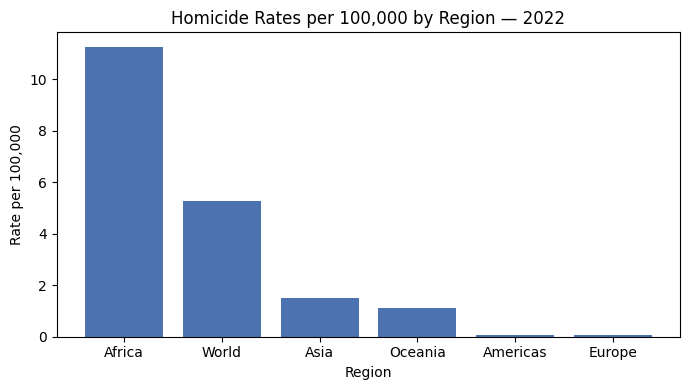

In [235]:
# Bar chart comparing regional rates in the latest common year
plt.figure(figsize=(7,4))
plt.bar(bar_df['Region'], bar_df['REG_RATE_per_100k'], color='#4C72B0')
plt.title(f'Homicide Rates per 100,000 by Region — {latest_common_year}')
plt.xlabel('Region')
plt.ylabel('Rate per 100,000')
plt.tight_layout()
plt.show()

In [236]:
# Save regional rates by year for reporting
reg[['Region', 'Year', 'REG_RATE_per_100k']].to_csv('q3_regional_rates.csv', index=False)
print("Saved: q3_regional_rates.csv")

Saved: q3_regional_rates.csv


### Question 4. How concentrated are global counts—what share of total homicides occur in the top 10 countries each year?

### Build a fair, comparable base (ensure a “core” slice exists)

In [237]:
# Ensure a core slice exists: Dimension=Total, Sex=Total, Age=Total
if 'core' not in globals():
    if {'Dimension','Sex','Age'}.issubset(cleaned.columns):
        core = cleaned[
            (cleaned['Dimension'] == 'Total') &
            (cleaned['Sex'] == 'Total') &
            (cleaned['Age'] == 'Total')
        ].copy()
    else:
        core = cleaned.copy()

# Keep only 'Counts' for this concentration analysis and exclude 'World'
counts = core[
    (core['Unit of measurement'] == 'Counts') &
    (core['Country'] != 'World')
].copy()

# Minimal columns for the calculation
counts = counts[['Year', 'Country', 'VALUE']]
counts.rename(columns={'VALUE': 'Counts'}, inplace=True)

### Compute the share of global counts captured by the top 10 countries each year

In [238]:
# For each year: rank countries by counts, sum top-10, compute share of global total
results = []

for yr, sub in counts.groupby('Year'):
    sub = sub.dropna(subset=['Counts'])
    if sub.empty:
        continue
    sub_sorted = sub.sort_values('Counts', ascending=False)

    top10_sum = sub_sorted['Counts'].head(10).sum()
    total_sum = sub_sorted['Counts'].sum()

    share = (top10_sum / total_sum) if total_sum > 0 else None
    results.append({'Year': int(yr), 'Top10_share': share})

q4_share = pd.DataFrame(results).sort_values('Year').reset_index(drop=True)
q4_share.head()

,Year,Top10_share
0,1990,0.856130
1,1991,0.875916
2,1992,0.858435
3,1993,0.856460
4,1994,0.840535


### Plot the time series of Top‑10 share (percentage of global counts)

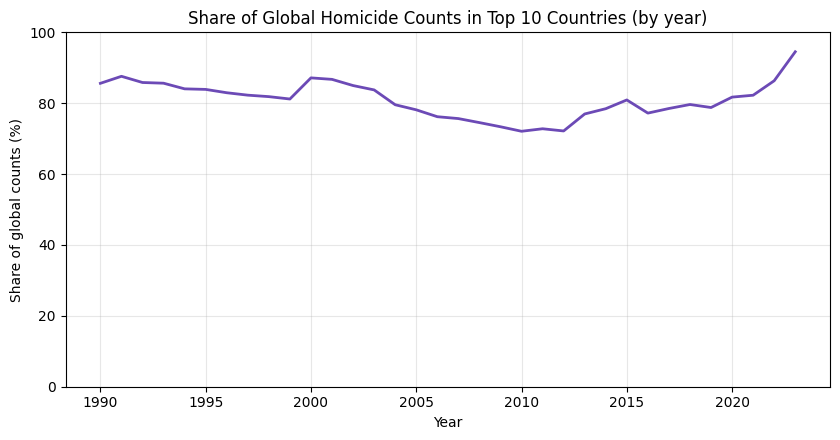

In [239]:
# Simple line chart of the Top-10 share over time
plt.figure(figsize=(8.5, 4.5))
plt.plot(q4_share['Year'], 100 * q4_share['Top10_share'], color='#6C4AB6', lw=2)
plt.title('Share of Global Homicide Counts in Top 10 Countries (by year)')
plt.xlabel('Year')
plt.ylabel('Share of global counts (%)')
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Question 5. What is the distribution of homicide by mechanisms (e.g., 'Firearms or explosives', 'Another weapon') globally or by a specific region?

### Build the mechanisms dataset (Counts; Total slice)

In [240]:
# Create a mechanisms dataframe at the Total slice (comparable across places)
mech = cleaned[
    (cleaned['Dimension'] == 'by mechanisms') &
    (cleaned['Sex'] == 'Total') &
    (cleaned['Age'] == 'Total') &
    (cleaned['Unit of measurement'] == 'Counts')
].copy()

# Keep minimal columns and standardize names
mech = mech[['Region', 'Country', 'Year', 'Category', 'VALUE']].rename(columns={'VALUE': 'Counts'})

# Quick check of available mechanism categories
mech_categories = sorted(mech['Category'].dropna().unique().tolist())
print("Mechanism categories (sample):", mech_categories[:12], "… (total:", len(mech_categories), ")")

Mechanism categories (sample): ['Another weapon', 'Another weapon - sharp object', 'Firearms or explosives', 'Firearms or explosives - firearms', 'Unspecified means', 'Without a weapon/ other Mechanism'] … (total: 6 )


### Global mechanism shares over time (stacked area)

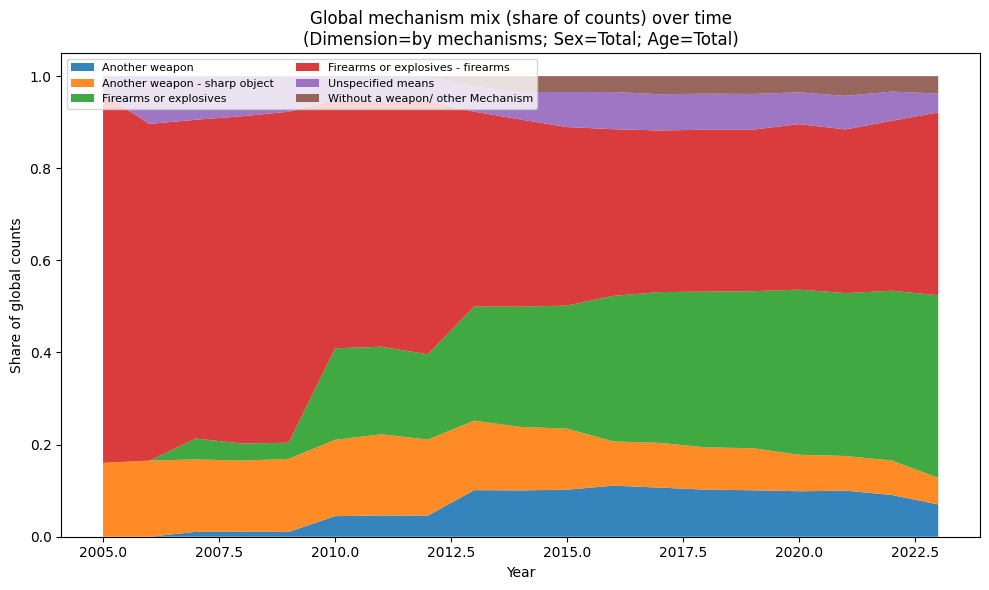

In [241]:
# Aggregate globally by Year × Category and compute shares
global_mech = (
    mech.groupby(['Year', 'Category'], as_index=False)['Counts'].sum()
    .pivot(index='Year', columns='Category', values='Counts')
    .fillna(0)
)

# Convert to shares by year
global_mech_share = global_mech.div(global_mech.sum(axis=1), axis=0)

# Plot stacked area of global shares
plt.figure(figsize=(10,6))
plt.stackplot(global_mech_share.index, global_mech_share.T, labels=global_mech_share.columns, alpha=0.9)
plt.title("Global mechanism mix (share of counts) over time\n(Dimension=by mechanisms; Sex=Total; Age=Total)")
plt.xlabel("Year")
plt.ylabel("Share of global counts")
plt.legend(loc='upper left', ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

### Global mechanism mix in the most recent year (bar chart)

Global mechanism distribution in 2023


,Category,Counts,Share_%
3,Firearms or explosives - firearms,48654.0,39.677711
2,Firearms or explosives,48611.0,39.642645
0,Another weapon,8586.0,7.001949
1,Another weapon - sharp object,7104.0,5.793367
4,Unspecified means,5050.0,4.118314
5,Without a weapon/ other Mechanism,4618.0,3.766015


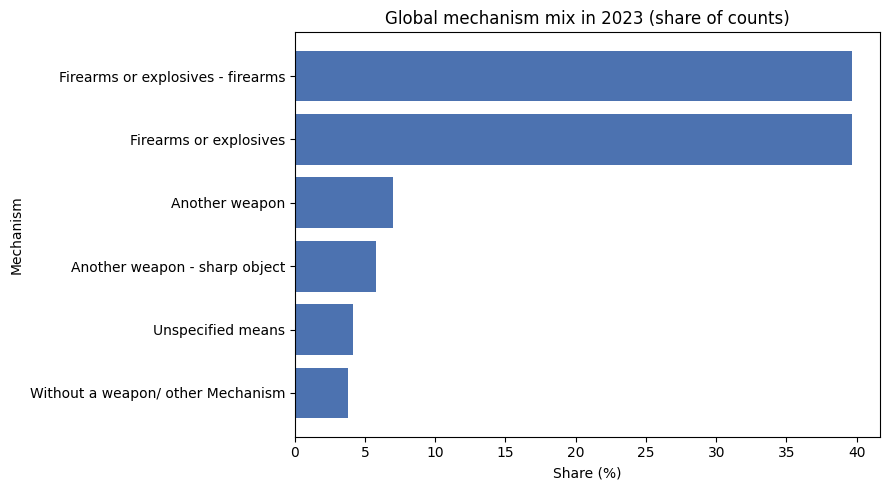

In [242]:
# Most recent year with mechanisms data
latest_mech_year = int(mech['Year'].max())

# Aggregate globally for that year
gm_latest = (
    mech[mech['Year'] == latest_mech_year]
    .groupby('Category', as_index=False)['Counts'].sum()
    .sort_values('Counts', ascending=False)
)

# Convert to shares
total_latest = gm_latest['Counts'].sum()
gm_latest['Share_%'] = 100 * gm_latest['Counts'] / total_latest

print(f"Global mechanism distribution in {latest_mech_year}")
display(gm_latest)

# Bar chart
plt.figure(figsize=(9,5))
plt.barh(gm_latest['Category'][::-1], gm_latest['Share_%'][::-1], color='#4C72B0')
plt.title(f"Global mechanism mix in {latest_mech_year} (share of counts)")
plt.xlabel("Share (%)")
plt.ylabel("Mechanism")
plt.tight_layout()
plt.show()

### Mechanism distribution by a specific region (Africa)

### Build the mechanisms dataset for Africa

In [243]:
# Africa, by mechanisms, Counts, Total slice (comparable across places)
mech_africa = cleaned[
    (cleaned['Region'] == 'Africa') &
    (cleaned['Dimension'] == 'by mechanisms') &
    (cleaned['Sex'] == 'Total') &
    (cleaned['Age'] == 'Total') &
    (cleaned['Unit of measurement'] == 'Counts')
].copy()

# Keep minimal columns and tidy names
mech_africa = mech_africa[['Year', 'Country', 'Category', 'VALUE']].rename(columns={'VALUE': 'Counts'})

# Quick check of available mechanism categories (helps with labeling)
africa_categories = sorted(mech_africa['Category'].dropna().unique().tolist())
print("Mechanism categories found (Africa):", africa_categories)

Mechanism categories found (Africa): ['Another weapon', 'Another weapon - sharp object', 'Firearms or explosives', 'Firearms or explosives - firearms', 'Unspecified means', 'Without a weapon/ other Mechanism']


### Global‑style stacked area for Africa’s shares over time (figure saved)

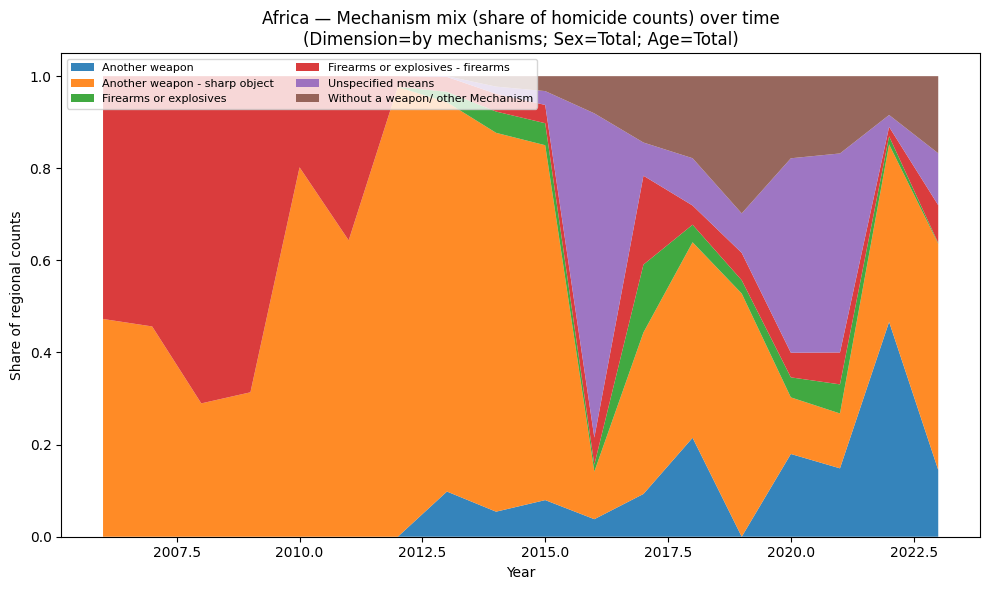

Saved figure: q5_africa_mechanisms_over_time.png


In [244]:
# Aggregate for Africa by Year × Category → pivot → convert to shares
af_ts = (mech_africa
         .groupby(['Year', 'Category'], as_index=False)['Counts'].sum()
         .pivot(index='Year', columns='Category', values='Counts')
         .fillna(0))

af_ts_share = af_ts.div(af_ts.sum(axis=1), axis=0)

# Stacked area plot of shares over time (Africa)
plt.figure(figsize=(10,6))
plt.stackplot(af_ts_share.index, af_ts_share.T, labels=af_ts_share.columns, alpha=0.9)
plt.title("Africa — Mechanism mix (share of homicide counts) over time\n(Dimension=by mechanisms; Sex=Total; Age=Total)")
plt.xlabel("Year")
plt.ylabel("Share of regional counts")
plt.legend(loc='upper left', ncol=2, fontsize=8)
plt.tight_layout()
plt.savefig("q5_africa_mechanisms_over_time.png", dpi=150)
plt.show()

print("Saved figure: q5_africa_mechanisms_over_time.png")

### Most recent year bar chart for Africa (figure saved) + a short auto‑summary

Africa mechanism distribution in 2023:


,Category,Counts,Share_%
1,Another weapon - sharp object,305.0,49.1
5,Without a weapon/ other Mechanism,104.0,16.7
0,Another weapon,90.0,14.5
4,Unspecified means,70.0,11.3
3,Firearms or explosives - firearms,51.0,8.2
2,Firearms or explosives,1.0,0.2


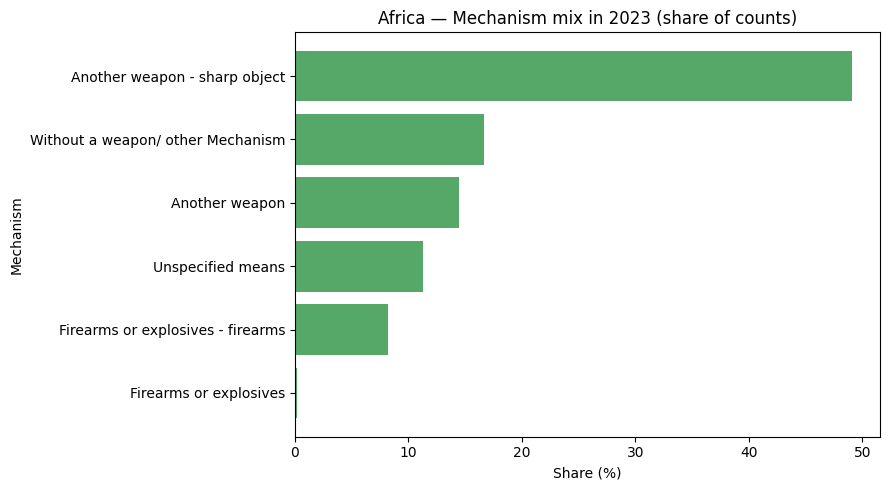

Saved figure: q5_africa_mechanisms_latest.png

Paste-ready summary:
In 2023, the leading mechanism in Africa was 'Another weapon - sharp object' at 49.1%, followed by 'Without a weapon/ other Mechanism' at 16.7% and 'Another weapon' at 14.5%.


In [245]:
# Find most recent year with Africa mechanisms data
latest_af_year = int(mech_africa['Year'].max())

# Aggregate by Category for that year; compute shares
af_latest = (mech_africa[mech_africa['Year'] == latest_af_year]
             .groupby('Category', as_index=False)['Counts'].sum()
             .sort_values('Counts', ascending=False))

total_latest = af_latest['Counts'].sum()
af_latest['Share_%'] = (100 * af_latest['Counts'] / total_latest).round(1)

print(f"Africa mechanism distribution in {latest_af_year}:")
display(af_latest)

# Bar chart (horizontal) for latest year
plt.figure(figsize=(9,5))
plt.barh(af_latest['Category'][::-1], af_latest['Share_%'][::-1], color='#55A868')
plt.title(f"Africa — Mechanism mix in {latest_af_year} (share of counts)")
plt.xlabel("Share (%)")
plt.ylabel("Mechanism")
plt.tight_layout()
plt.savefig("q5_africa_mechanisms_latest.png", dpi=150)
plt.show()

print("Saved figure: q5_africa_mechanisms_latest.png")

# Auto-generate a short sentence for your report (paste-ready)
top3 = af_latest.head(3)
if len(top3) == 3:
    t1, s1 = top3.iloc[0]['Category'], top3.iloc[0]['Share_%']
    t2, s2 = top3.iloc[1]['Category'], top3.iloc[1]['Share_%']
    t3, s3 = top3.iloc[2]['Category'], top3.iloc[2]['Share_%']
    summary_line = (f"In {latest_af_year}, the leading mechanism in Africa was '{t1}' "
                    f"at {s1}%, followed by '{t2}' at {s2}% and '{t3}' at {s3}%.")
    print("\nPaste-ready summary:")
    print(summary_line)

### (Africa) — Sub‑region mechanism distribution (latest year)

In [246]:
# Build an Africa-by-subregion mechanisms table (Counts; Total slice)
mech_africa_sr = cleaned[
    (cleaned['Region'] == 'Africa') &
    (cleaned['Dimension'] == 'by mechanisms') &
    (cleaned['Sex'] == 'Total') &
    (cleaned['Age'] == 'Total') &
    (cleaned['Unit of measurement'] == 'Counts')
].copy()

# Keep minimal columns
mech_africa_sr = mech_africa_sr[['Subregion', 'Year', 'Category', 'VALUE']].rename(columns={'VALUE':'Counts'})

# Identify the latest year with any subregional data
latest_af_year_sr = int(mech_africa_sr['Year'].max())

# Aggregate by Subregion × Category for the latest year
sr_latest = (
    mech_africa_sr[mech_africa_sr['Year'] == latest_af_year_sr]
    .groupby(['Subregion','Category'], as_index=False)['Counts'].sum()
)

# Compute shares within each subregion
sr_latest['Total_sub'] = sr_latest.groupby('Subregion')['Counts'].transform('sum')
sr_latest['Share_%'] = (100 * sr_latest['Counts'] / sr_latest['Total_sub']).round(1)

# Sort categories within each subregion by share (descending) for cleaner bars
sr_latest = sr_latest.sort_values(['Subregion','Share_%'], ascending=[True, False]).reset_index(drop=True)

# Pivot for a clean “Subregion × Category → Share_%” table (handy to export/view)
sr_latest_pivot = sr_latest.pivot(index='Subregion', columns='Category', values='Share_%').fillna(0).round(1)
sr_latest_pivot

Category,Another weapon,Another weapon - sharp object,Firearms or explosives,Firearms or explosives - firearms,Unspecified means,Without a weapon/ other Mechanism
Subregion,,,,,,
Northern Africa,1.9,56.9,0.0,9.3,13.1,18.8
Sub-Saharan Africa,94.1,0.0,1.2,1.2,0.0,3.5


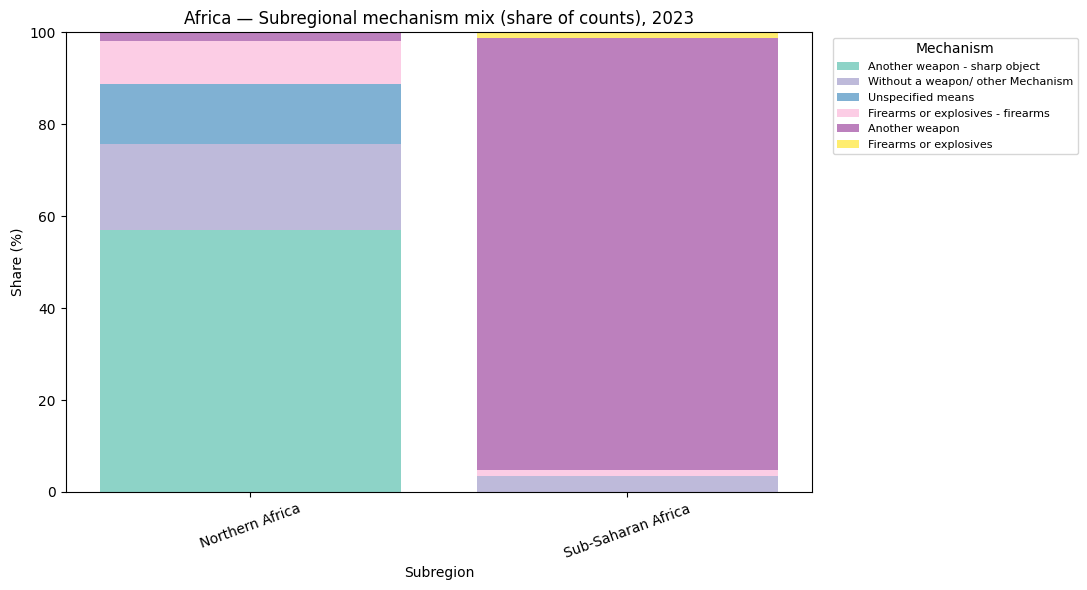

Saved figure: q5_africa_subregions_latest.png


In [247]:
# Plot subregional mechanism shares (stacked bars) for the latest year
import numpy as np
import matplotlib.pyplot as plt

# Prepare a consistent category order across subregions
cat_order = list(sr_latest['Category'].dropna().unique())

# Build a stacked bar per subregion
subs = sr_latest['Subregion'].dropna().unique().tolist()
subs_sorted = sorted(subs)  # alphabetical for readability

# Create a values matrix aligned to cat_order for each subregion
vals_matrix = []
for sub in subs_sorted:
    sub_row = sr_latest[sr_latest['Subregion'] == sub][['Category','Share_%']]
    row_map = dict(zip(sub_row['Category'], sub_row['Share_%']))
    vals_matrix.append([row_map.get(cat, 0.0) for cat in cat_order])
vals_matrix = np.array(vals_matrix)

# Stacked bar plot
fig, ax = plt.subplots(figsize=(11, 6))

bottom = np.zeros(len(subs_sorted))
colors = plt.cm.Set3(np.linspace(0, 1, len(cat_order)))

for i, cat in enumerate(cat_order):
    ax.bar(subs_sorted, vals_matrix[:, i], bottom=bottom, color=colors[i], label=cat)
    bottom += vals_matrix[:, i]

ax.set_title(f"Africa — Subregional mechanism mix (share of counts), {latest_af_year_sr}")
ax.set_xlabel("Subregion")
ax.set_ylabel("Share (%)")
ax.set_ylim(0, 100)
ax.legend(title="Mechanism", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("q5_africa_subregions_latest.png", dpi=150)
plt.show()

print("Saved figure: q5_africa_subregions_latest.png")

In [248]:
# Optional: export a tidy CSV for exact subregional shares in the latest year
sr_latest[['Subregion','Category','Counts','Share_%']].to_csv(
    "q5_africa_subregions_latest.csv", index=False
)
print("Saved table: q5_africa_subregions_latest.csv")

Saved table: q5_africa_subregions_latest.csv


### (Africa) — Sub‑region mechanism shares over time (small multiples, optional)

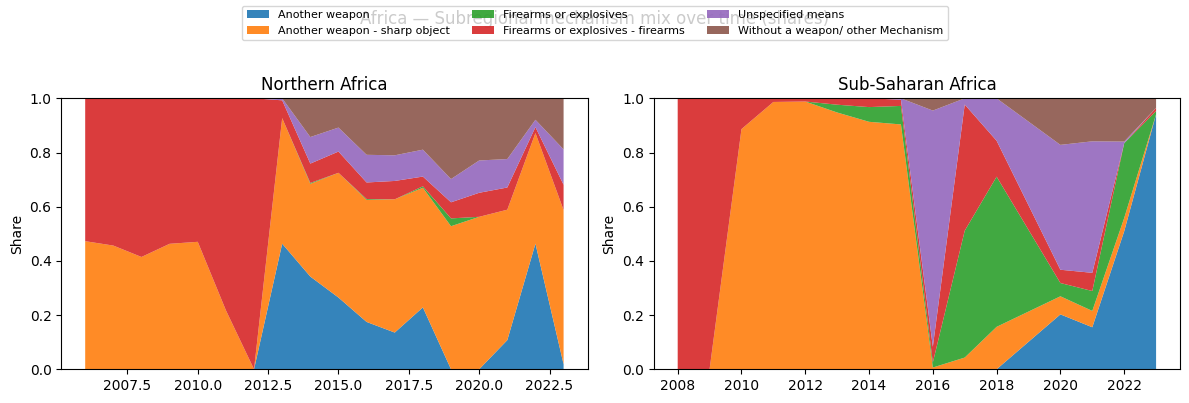

Saved figure: q5_africa_subregions_over_time.png


In [249]:
# Build subregion × year × category time series for shares
af_sr_ts = (
    mech_africa_sr
    .groupby(['Subregion','Year','Category'], as_index=False)['Counts'].sum()
    .pivot_table(index=['Subregion','Year'], columns='Category', values='Counts', aggfunc='sum')
    .fillna(0)
)

# Convert to shares within each Subregion × Year
af_sr_ts_share = af_sr_ts.div(af_sr_ts.sum(axis=1), axis=0).reset_index()

# Determine subregions and categories for plotting
subs = sorted(af_sr_ts_share['Subregion'].dropna().unique().tolist())
cats = af_sr_ts_share.columns[2:].tolist()  # categories start from column index 2

# Small multiples: stacked area for each subregion
n = len(subs)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4*nrows), sharex=False)
axes = axes.flatten() if n > 1 else [axes]

for idx, sub in enumerate(subs):
    sub_df = af_sr_ts_share[af_sr_ts_share['Subregion'] == sub].sort_values('Year')
    ax = axes[idx]
    # Build stacked area in a consistent category order
    yvals = [sub_df[cat].values if cat in sub_df.columns else np.zeros(len(sub_df)) for cat in cats]
    ax.stackplot(sub_df['Year'].values, yvals, labels=cats, alpha=0.9)
    ax.set_title(sub)
    ax.set_ylabel("Share")
    ax.set_ylim(0, 1.0)

# Hide any unused axes (if odd number of subplots)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Africa — Subregional mechanism mix over time (shares)", y=0.995, fontsize=12)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=min(3, len(cats)), fontsize=8)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("q5_africa_subregions_over_time.png", dpi=150)
plt.show()

print("Saved figure: q5_africa_subregions_over_time.png")

### Trends in the last 20 years, Prepare the last‑20‑years window and core slice

In [250]:
# Use the comparable "Total" slice where available
if 'core' not in globals():
    if {'Dimension','Sex','Age'}.issubset(cleaned.columns):
        core = cleaned[
            (cleaned['Dimension'] == 'Total') &
            (cleaned['Sex'] == 'Total') &
            (cleaned['Age'] == 'Total')
        ].copy()
    else:
        core = cleaned.copy()

# Identify last 20-year range based on available data
last_year = int(core['Year'].max())
first_year_20 = last_year - 19  # inclusive window
print("Last-20-year window:", first_year_20, "to", last_year)

Last-20-year window: 2004 to 2023


### Build country‑year Counts & Rates and compute implied population

In [251]:
# Minimal columns for the merge
keep_cols = ['Region','Subregion','Country','Year','VALUE']

counts = core[core['Unit of measurement'] == 'Counts'][keep_cols].copy()
counts = counts.rename(columns={'VALUE':'COUNT'})

rates = core[core['Unit of measurement'] == 'Rate per 100,000 population'][keep_cols].copy()
rates = rates.rename(columns={'VALUE':'RATE'})

# Merge and compute implied population (avoid zero / missing rates)
cr = counts.merge(rates, on=['Region','Subregion','Country','Year'], how='inner')
cr = cr.dropna(subset=['COUNT','RATE'])
cr = cr[cr['RATE'] > 0]

cr['POP'] = cr['COUNT'] / (cr['RATE'] / 100000.0)

# Keep only last 20 years
cr_20 = cr[(cr['Year'] >= first_year_20) & (cr['Year'] <= last_year)].copy()
print("Rows in last-20-year country panel:", cr_20.shape[0])

Rows in last-20-year country panel: 7907


### Compute population‑weighted regional rates and plot trends

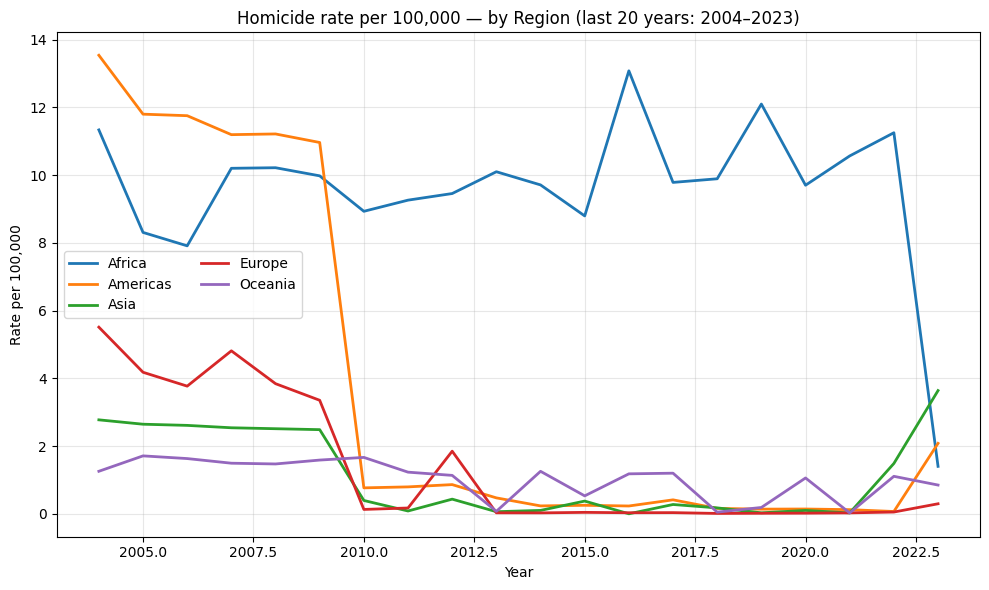

Saved figure: q_regions_trends_last20.png


In [252]:
# Regional rate = 100k * SUM(COUNT) / SUM(POP) per Region-Year
reg_20 = (
    cr_20.groupby(['Region','Year'], as_index=False)[['COUNT','POP']].sum()
)
reg_20['REG_RATE'] = 100000.0 * reg_20['COUNT'] / reg_20['POP']

# Line plot of regions
valid_regions = ['Africa','Americas','Asia','Europe','Oceania']
reg_plot = reg_20[reg_20['Region'].isin(valid_regions)].copy()

plt.figure(figsize=(10,6))
for region, sub in reg_plot.groupby('Region'):
    plt.plot(sub['Year'], sub['REG_RATE'], label=region, lw=2)
plt.title(f'Homicide rate per 100,000 — by Region (last 20 years: {first_year_20}–{last_year})')
plt.xlabel('Year'); plt.ylabel('Rate per 100,000')
plt.legend(ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q_regions_trends_last20.png', dpi=150)
plt.show()

print("Saved figure: q_regions_trends_last20.png")

### Compute population‑weighted subregional rates and plot small‑multiples

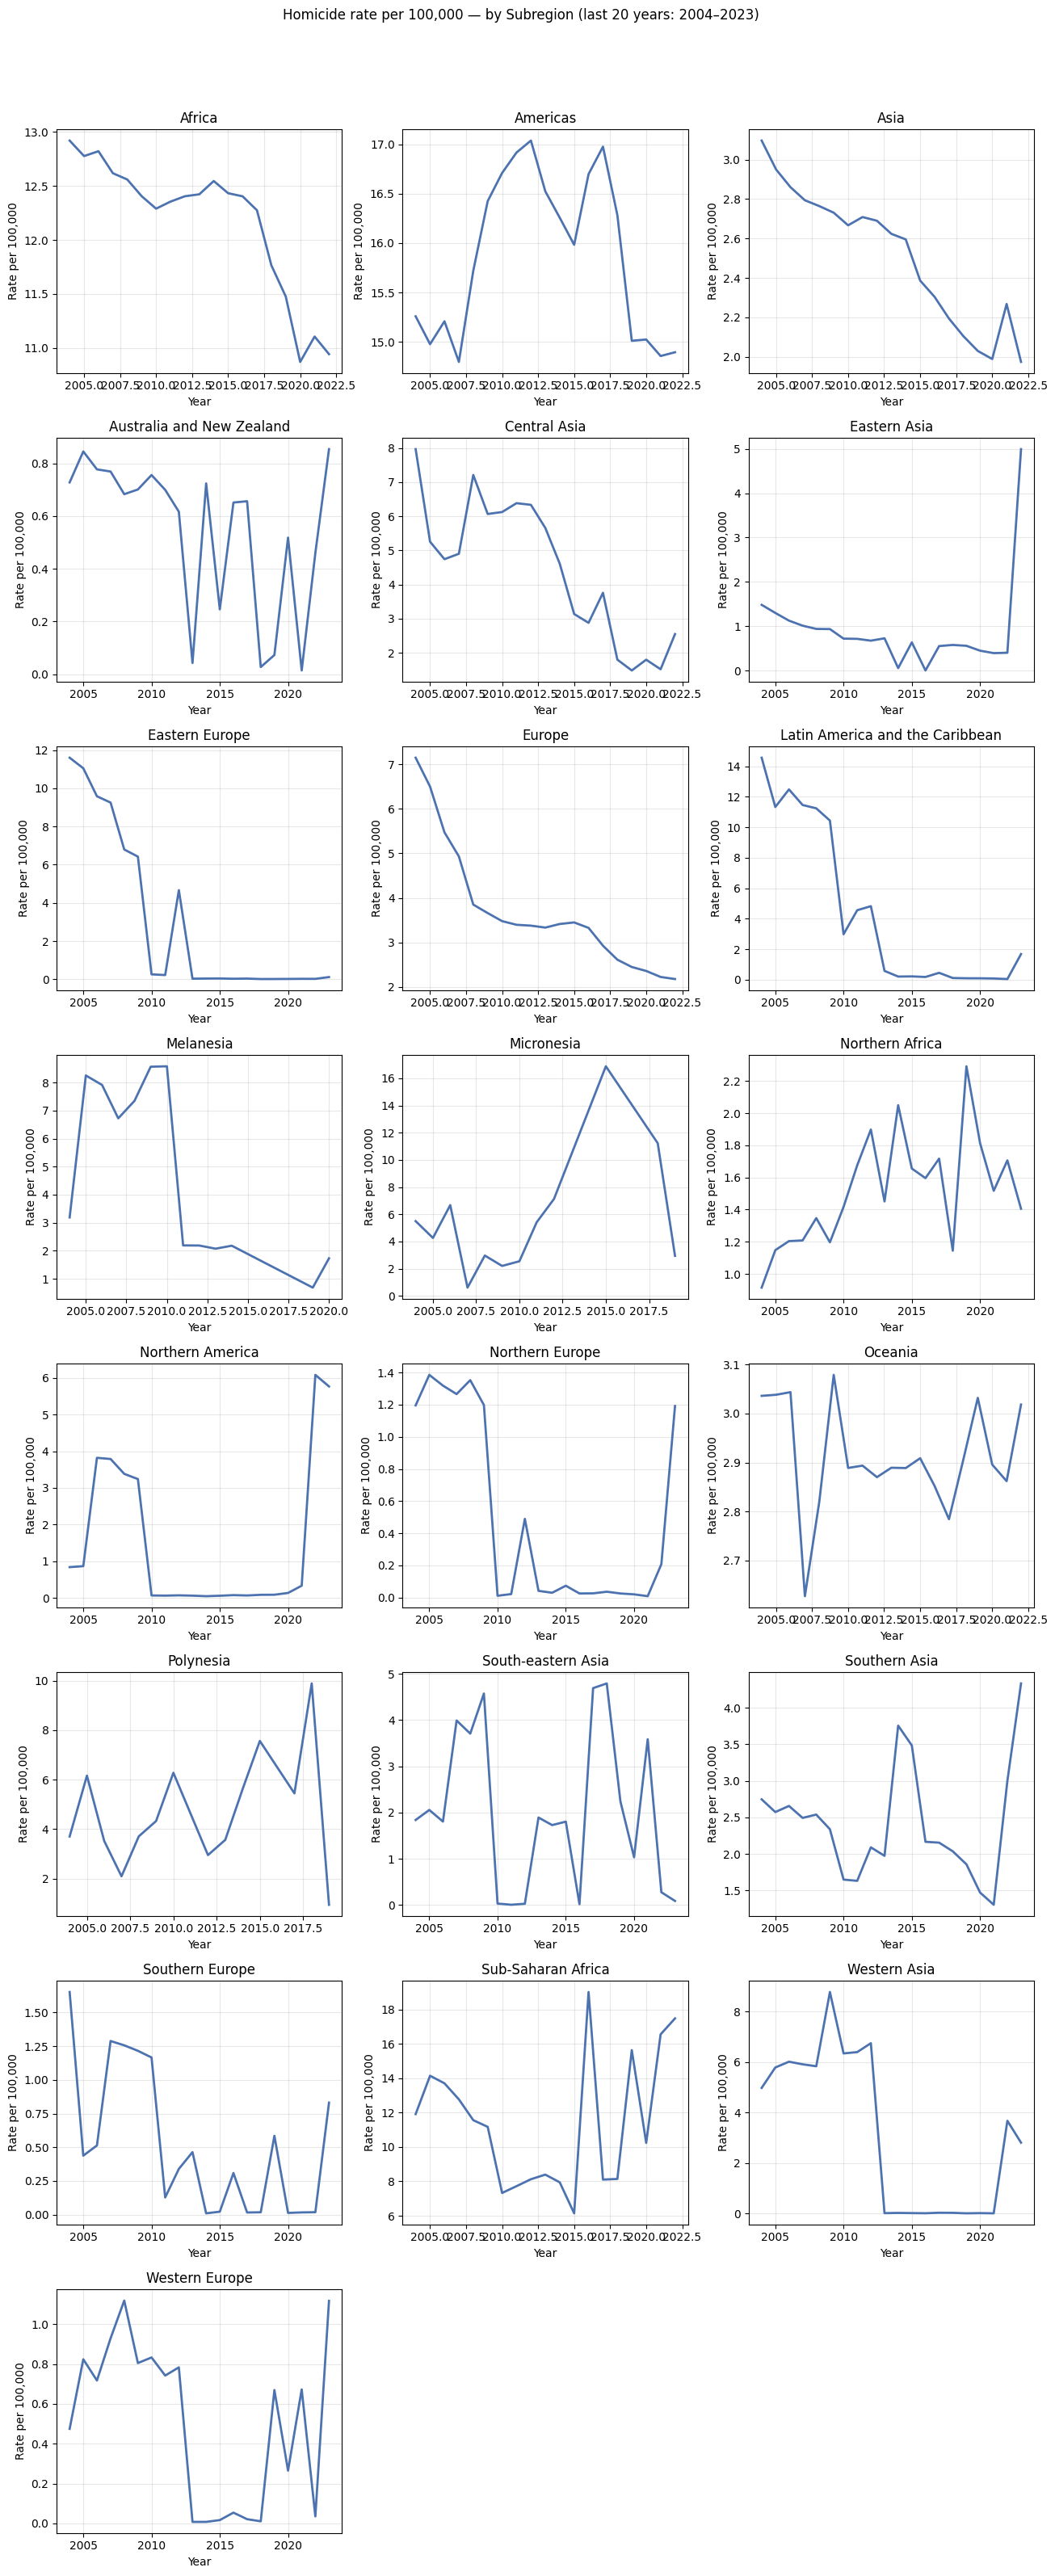

Saved figure: q_subregions_trends_last20.png


In [253]:
# Subregional rate = 100k * SUM(COUNT) / SUM(POP) per Subregion-Year
sub_20 = (
    cr_20.groupby(['Subregion','Year'], as_index=False)[['COUNT','POP']].sum()
)
sub_20['SUBREG_RATE'] = 100000.0 * sub_20['COUNT'] / sub_20['POP']

# Clean subregion labels (drop blanks, if any)
sub_20 = sub_20[sub_20['Subregion'].notna()].copy()
sub_list = sorted(sub_20['Subregion'].unique().tolist())
n = len(sub_list)
ncols = 3
nrows = (n + ncols - 1) // ncols  # ceiling division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 4*nrows), sharex=False, sharey=False)
axes = axes.flatten()

for idx, subr in enumerate(sub_list):
    ax = axes[idx]
    ss = sub_20[sub_20['Subregion'] == subr].sort_values('Year')
    ax.plot(ss['Year'], ss['SUBREG_RATE'], color='#4C72B0', lw=2)
    ax.set_title(subr)
    ax.set_xlabel('Year'); ax.set_ylabel('Rate per 100,000')
    ax.grid(True, alpha=0.3)

# Hide any unused axes
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f'Homicide rate per 100,000 — by Subregion (last 20 years: {first_year_20}–{last_year})', y=0.995, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('q_subregions_trends_last20.png', dpi=150)
plt.show()

print("Saved figure: q_subregions_trends_last20.png")

### Create summary tables (absolute + % change, last‑20 years) and save

In [254]:
# Region: compute change from window start to end
reg_summary = []
for region, sub in reg_plot.groupby('Region'):
    s = sub.sort_values('Year')
    # ensure we have both endpoints in the window
    v_start = s.loc[s['Year'] == first_year_20, 'REG_RATE']
    v_end   = s.loc[s['Year'] == last_year,      'REG_RATE']
    if len(v_start) and len(v_end):
        start = float(v_start.iloc[0])
        end   = float(v_end.iloc[0])
        abs_change = end - start
        pct_change = (abs_change / start * 100.0) if start != 0 else None
        reg_summary.append({'Region': region,
                            'StartYear': first_year_20, 'StartRate': round(start,2),
                            'EndYear': last_year,        'EndRate':   round(end,2),
                            'AbsChange': round(abs_change,2),
                            'PctChange_%': round(pct_change,1) if pct_change is not None else None})
reg_summary = pd.DataFrame(reg_summary).sort_values('EndRate', ascending=False)
display(reg_summary)

# Subregion: same summary
sub_summary = []
for subr, ss in sub_20.groupby('Subregion'):
    ss = ss.sort_values('Year')
    v_start = ss.loc[ss['Year'] == first_year_20, 'SUBREG_RATE']
    v_end   = ss.loc[ss['Year'] == last_year,      'SUBREG_RATE']
    if len(v_start) and len(v_end):
        start = float(v_start.iloc[0])
        end   = float(v_end.iloc[0])
        abs_change = end - start
        pct_change = (abs_change / start * 100.0) if start != 0 else None
        sub_summary.append({'Subregion': subr,
                            'StartYear': first_year_20, 'StartRate': round(start,2),
                            'EndYear': last_year,        'EndRate':   round(end,2),
                            'AbsChange': round(abs_change,2),
                            'PctChange_%': round(pct_change,1) if pct_change is not None else None})
sub_summary = pd.DataFrame(sub_summary).sort_values('EndRate', ascending=False)
display(sub_summary)

# Save the tables for the report
reg_summary.to_csv('q_regions_trends_last20_summary.csv', index=False)
sub_summary.to_csv('q_subregions_trends_last20_summary.csv', index=False)
print("Saved:", 'q_regions_trends_last20_summary.csv', 'and', 'q_subregions_trends_last20_summary.csv')

,Region,StartYear,StartRate,EndYear,EndRate,AbsChange,PctChange_%
2,Asia,2004,2.78,2023,3.64,0.86,31.1
1,Americas,2004,13.54,2023,2.08,-11.45,-84.6
0,Africa,2004,11.34,2023,1.41,-9.93,-87.6
4,Oceania,2004,1.26,2023,0.85,-0.41,-32.2
3,Europe,2004,5.51,2023,0.30,-5.21,-94.5


,Subregion,StartYear,StartRate,EndYear,EndRate,AbsChange,PctChange_%
5,Northern America,2004,0.84,2023,5.76,4.92,584.9
1,Eastern Asia,2004,1.48,2023,4.99,3.51,237.1
8,Southern Asia,2004,2.75,2023,4.33,1.59,57.8
10,Western Asia,2004,4.97,2023,2.80,-2.17,-43.6
3,Latin America and the Caribbean,2004,14.56,2023,1.68,-12.88,-88.4
4,Northern Africa,2004,0.92,2023,1.41,0.49,53.6
6,Northern Europe,2004,1.20,2023,1.19,-0.00,-0.3
11,Western Europe,2004,0.47,2023,1.12,0.64,135.3
0,Australia and New Zealand,2004,0.73,2023,0.85,0.13,17.3
9,Southern Europe,2004,1.65,2023,0.83,-0.82,-49.7


Saved: q_regions_trends_last20_summary.csv and q_subregions_trends_last20_summary.csv


### Q6: 6. Is there a significant difference in crime rates (either total or homicide) between male and female victims?

### World: Male vs Female homicide rates over time (line chart; figure saved)

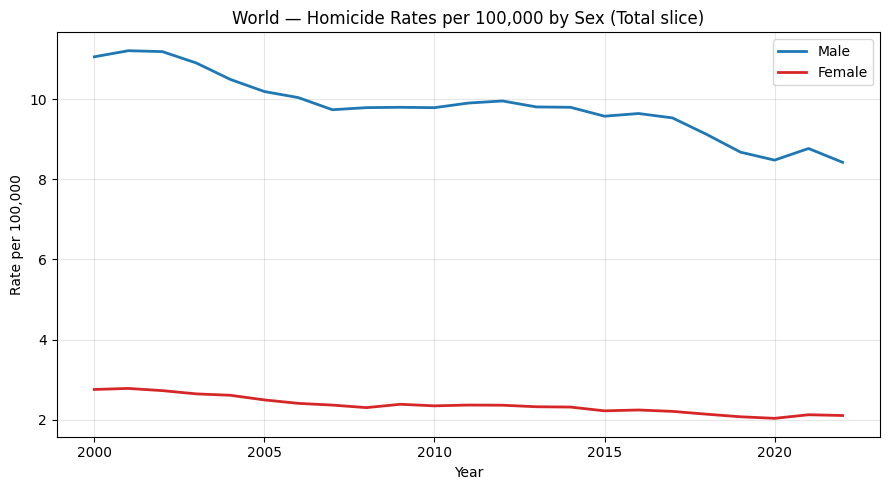

Saved figure: q6_world_rates_mf.png


Sex,Female_rate,Male_rate
Year,,
2018,2.138331,9.122694
2019,2.073866,8.677549
2020,2.034745,8.479234
2021,2.124510,8.769468
2022,2.105293,8.424728


In [255]:
# Build World time series for Male/Female rates (Total slice)
world_mask = (
    (cleaned['Country'] == 'World') &
    (cleaned['Dimension'] == 'Total') &
    (cleaned['Sex'].isin(['Male','Female'])) &
    (cleaned['Age'] == 'Total') &
    (cleaned['Unit of measurement'] == 'Rate per 100,000 population')
)

world_mf = (
    cleaned[world_mask]
    .pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='first')
    .sort_index()
    .rename(columns={'Male':'Male_rate', 'Female':'Female_rate'})
)

# Plot
plt.figure(figsize=(9,5))
plt.plot(world_mf.index, world_mf['Male_rate'],   label='Male',   color='#1f77b4', lw=2)
plt.plot(world_mf.index, world_mf['Female_rate'], label='Female', color='#d62728', lw=2)
plt.title('World — Homicide Rates per 100,000 by Sex (Total slice)')
plt.xlabel('Year'); plt.ylabel('Rate per 100,000')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q6_world_rates_mf.png', dpi=150)
plt.show()

print("Saved figure: q6_world_rates_mf.png")
world_mf.tail(5)

### World: Male share of victims over time (Counts; figure saved)

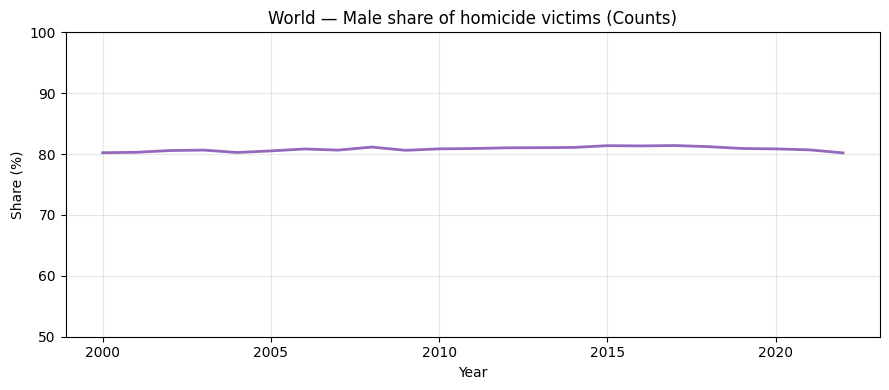

Saved figure: q6_world_male_share.png


Sex,Female,Male,Male_share
Year,,,
2018,82047.209983,354913.439561,0.812232
2019,80421.810046,341116.324344,0.809218
2020,79687.127833,336491.429117,0.808527
2021,83939.534414,350852.887000,0.806943
2022,83921.208677,339889.301457,0.801984


In [256]:
# Build World time series for Male/Female counts and derive Male share
world_counts_mask = (
    (cleaned['Country'] == 'World') &
    (cleaned['Dimension'] == 'Total') &
    (cleaned['Sex'].isin(['Male','Female'])) &
    (cleaned['Age'] == 'Total') &
    (cleaned['Unit of measurement'] == 'Counts')
)

world_cnt = (
    cleaned[world_counts_mask]
    .pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')
    .sort_index()
)

if {'Male','Female'}.issubset(world_cnt.columns):
    world_cnt['Male_share'] = world_cnt['Male'] / (world_cnt['Male'] + world_cnt['Female'])

    plt.figure(figsize=(9,4))
    plt.plot(world_cnt.index, 100*world_cnt['Male_share'], color='#9467bd', lw=2)
    plt.title('World — Male share of homicide victims (Counts)')
    plt.xlabel('Year'); plt.ylabel('Share (%)')
    plt.ylim(50, 100)  # typical range; adjust if needed
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('q6_world_male_share.png', dpi=150)
    plt.show()

    print("Saved figure: q6_world_male_share.png")
world_cnt.tail(5)

### Latest year: country‑level Male vs Female rates (gap distribution; figures & summary)

Latest year (rates): 2023
Countries with both sexes available: 48
% of countries where Male rate > Female rate: 85.4%
Mean gap (Male - Female): 8.89 per 100k
Median gap (Male - Female): 1.03 per 100k


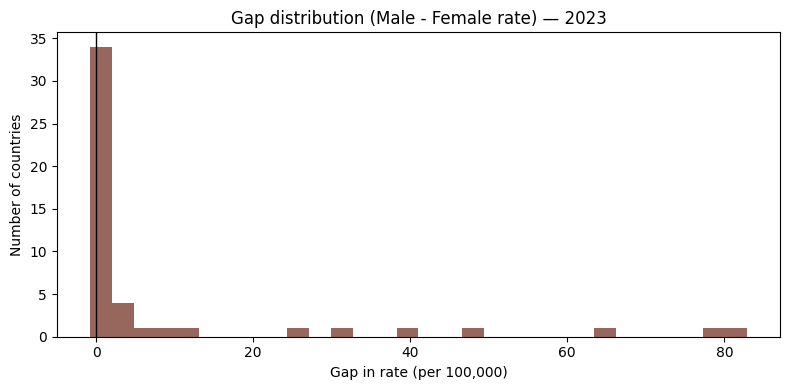

Saved figure: q6_gap_hist.png


Sex,Country,Region,Male_rate,Female_rate,Gap_MaleMinusFemale
22,Jamaica,Americas,91.191123,8.292429,82.898694
12,Ecuador,Americas,84.506880,6.655476,77.851404
17,Haiti,Americas,74.215650,8.730710,65.484940
19,Honduras,Americas,54.779185,7.662979,47.116207
27,Mexico,Americas,44.882785,5.596164,39.286621
9,Costa Rica,Americas,33.093770,2.749389,30.344381
36,Puerto Rico,Americas,27.690957,2.391440,25.299517
4,Bermuda,Americas,12.626462,0.000000,12.626462
28,Mongolia,Asia,10.045200,1.802669,8.242531
47,United States of America,Americas,8.944386,2.550784,6.393602


Sex,Country,Region,Male_rate,Female_rate,Gap_MaleMinusFemale
24,Latvia,Europe,2.064444,2.869893,-0.805449
26,Malta,Europe,0.361575,0.780066,-0.418491
3,Austria,Europe,0.778810,0.970582,-0.191772
11,Czechia,Europe,0.712919,0.821241,-0.108322
45,Switzerland,Europe,0.567508,0.627052,-0.059544
40,Singapore,Asia,0.066836,0.071513,-0.004676
18,Holy See,Europe,0.000000,0.000000,0.000000
34,Oman,Asia,0.159516,0.104451,0.055065
8,"China, Macao Special Administrative Region",Asia,0.607320,0.520026,0.087294
33,Norway,Europe,0.791105,0.657355,0.133749


In [257]:
# Country-level comparison in the most recent year for rates
mf_latest = cleaned[
    (cleaned['Dimension'] == 'Total') &
    (cleaned['Sex'].isin(['Male','Female'])) &
    (cleaned['Age'] == 'Total') &
    (cleaned['Unit of measurement'] == 'Rate per 100,000 population')].copy()

latest_year_mf = int(mf_latest['Year'].max())

mf_yr = mf_latest[(mf_latest['Year'] == latest_year_mf) & (cleaned['Country'] != 'World')].copy()
mf_yr_piv = (
    mf_yr.pivot_table(index=['Country','Region'], columns='Sex', values='VALUE', aggfunc='first')
         .rename(columns={'Male':'Male_rate','Female':'Female_rate'})
         .dropna(subset=['Male_rate','Female_rate'])
         .reset_index()
)

# Gap and quick stats
mf_yr_piv['Gap_MaleMinusFemale'] = mf_yr_piv['Male_rate'] - mf_yr_piv['Female_rate']
n_c = mf_yr_piv.shape[0]
pct_male_higher = 100 * (mf_yr_piv['Gap_MaleMinusFemale'] > 0).mean()
mean_gap = mf_yr_piv['Gap_MaleMinusFemale'].mean()
median_gap = mf_yr_piv['Gap_MaleMinusFemale'].median()

print(f"Latest year (rates): {latest_year_mf}")
print(f"Countries with both sexes available: {n_c}")
print(f"% of countries where Male rate > Female rate: {pct_male_higher:.1f}%")
print(f"Mean gap (Male - Female): {mean_gap:.2f} per 100k")
print(f"Median gap (Male - Female): {median_gap:.2f} per 100k")

# Histogram of gaps
plt.figure(figsize=(8,4))
plt.hist(mf_yr_piv['Gap_MaleMinusFemale'], bins=30, color='#8c564b', alpha=0.9)
plt.axvline(0, color='black', lw=1)
plt.title(f'Gap distribution (Male - Female rate) — {latest_year_mf}')
plt.xlabel('Gap in rate (per 100,000)'); plt.ylabel('Number of countries')
plt.tight_layout()
plt.savefig('q6_gap_hist.png', dpi=150)
plt.show()

print("Saved figure: q6_gap_hist.png")

# Top 10 biggest positive and negative gaps (optional view)
top10_pos = mf_yr_piv.sort_values('Gap_MaleMinusFemale', ascending=False).head(10)
top10_neg = mf_yr_piv.sort_values('Gap_MaleMinusFemale', ascending=True).head(10)
display(top10_pos[['Country','Region','Male_rate','Female_rate','Gap_MaleMinusFemale']])
display(top10_neg[['Country','Region','Male_rate','Female_rate','Gap_MaleMinusFemale']])

### Latest year: by Region, population‑weighted Male vs Female rates (figure saved)

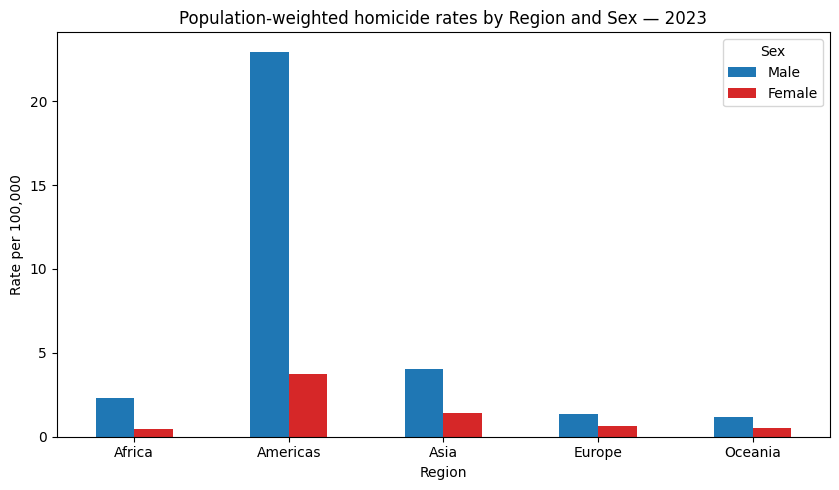

Saved figure: q6_region_rates_mf_latest.png


Sex,Male,Female
Region,,
Africa,2.31,0.48
Americas,22.96,3.71
Asia,4.03,1.43
Europe,1.35,0.66
Oceania,1.16,0.53


In [258]:
# Build implied population in the latest year to compute region-level rates by sex
latest_mask_counts = (
    (cleaned['Dimension'] == 'Total') &
    (cleaned['Sex'].isin(['Male','Female'])) &
    (cleaned['Age'] == 'Total') &
    (cleaned['Unit of measurement'] == 'Counts') &
    (cleaned['Year'] == latest_year_mf) &
    (cleaned['Country'] != 'World')
)
latest_mask_rates = (
    (cleaned['Dimension'] == 'Total') &
    (cleaned['Sex'].isin(['Male','Female'])) &
    (cleaned['Age'] == 'Total') &
    (cleaned['Unit of measurement'] == 'Rate per 100,000 population') &
    (cleaned['Year'] == latest_year_mf) &
    (cleaned['Country'] != 'World')
)

counts_latest = cleaned[latest_mask_counts][['Region','Country','Sex','Year','VALUE']].rename(columns={'VALUE':'COUNT'})
rates_latest  = cleaned[latest_mask_rates][['Region','Country','Sex','Year','VALUE']].rename(columns={'VALUE':'RATE'})

mr = counts_latest.merge(rates_latest, on=['Region','Country','Sex','Year'], how='inner')
mr = mr.dropna(subset=['COUNT','RATE'])
mr = mr[mr['RATE'] > 0].copy()
mr['POP'] = mr['COUNT'] / (mr['RATE']/100000.0)

# Region-level: rate = 100k * SUM(COUNT)/SUM(POP), computed separately for Male and Female
reg_mf = (
    mr.groupby(['Region','Sex'], as_index=False)[['COUNT','POP']].sum()
)
reg_mf['REG_RATE'] = 100000.0 * reg_mf['COUNT'] / reg_mf['POP']

# Pivot for side-by-side bars
reg_mf_p = reg_mf.pivot(index='Region', columns='Sex', values='REG_RATE').reindex(
    ['Africa','Americas','Asia','Europe','Oceania']
)
reg_mf_p = reg_mf_p[['Male','Female']].round(2).dropna(how='all')

# Plot
ax = reg_mf_p.plot(kind='bar', figsize=(8.5,5), color=['#1f77b4','#d62728'])
plt.title(f'Population-weighted homicide rates by Region and Sex — {latest_year_mf}')
plt.xlabel('Region'); plt.ylabel('Rate per 100,000')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('q6_region_rates_mf_latest.png', dpi=150)
plt.show()

print("Saved figure: q6_region_rates_mf_latest.png")
reg_mf_p

### Top 10 countries by Male–Female rate gap (latest year)

In [259]:
# Ensure we have the latest-year country pivot with Male/Female rates
if 'mf_yr_piv' not in globals():
    # Build from 'cleaned' (Total slice, latest year, rates only, exclude 'World')
    mf_latest = cleaned[
        (cleaned['Dimension'] == 'Total') &
        (cleaned['Sex'].isin(['Male','Female'])) &
        (cleaned['Age'] == 'Total') &
        (cleaned['Unit of measurement'] == 'Rate per 100,000 population')
    ].copy()

    latest_year_mf = int(mf_latest['Year'].max())

    mf_yr = mf_latest[
        (mf_latest['Year'] == latest_year_mf) &
        (mf_latest['Country'] != 'World')
    ].copy()

    mf_yr_piv = (
        mf_yr.pivot_table(index=['Country','Region'], columns='Sex', values='VALUE', aggfunc='first')
             .rename(columns={'Male':'Male_rate','Female':'Female_rate'})
             .dropna(subset=['Male_rate','Female_rate'])
             .reset_index()
    )

# Compute gap (Male - Female) and extract top 10
mf_yr_piv['Gap_MaleMinusFemale'] = mf_yr_piv['Male_rate'] - mf_yr_piv['Female_rate']
top10_gap = mf_yr_piv.sort_values('Gap_MaleMinusFemale', ascending=False).head(10)

print(f"Latest year (rates): {latest_year_mf}")
display(top10_gap[['Country','Region','Male_rate','Female_rate','Gap_MaleMinusFemale']].round(2))

Latest year (rates): 2023


Sex,Country,Region,Male_rate,Female_rate,Gap_MaleMinusFemale
22,Jamaica,Americas,91.19,8.29,82.90
12,Ecuador,Americas,84.51,6.66,77.85
17,Haiti,Americas,74.22,8.73,65.48
19,Honduras,Americas,54.78,7.66,47.12
27,Mexico,Americas,44.88,5.60,39.29
9,Costa Rica,Americas,33.09,2.75,30.34
36,Puerto Rico,Americas,27.69,2.39,25.30
4,Bermuda,Americas,12.63,0.00,12.63
28,Mongolia,Asia,10.05,1.80,8.24
47,United States of America,Americas,8.94,2.55,6.39


### Bar chart: Top 10 Male–Female gaps (save figure)

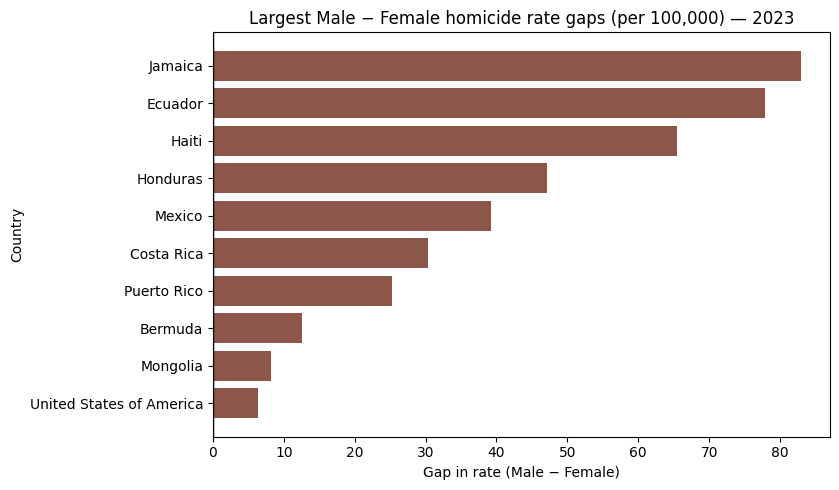

Saved figure: q6_top10_mf_gap.png


In [260]:
# Horizontal bar chart of the top 10 Male–Female gaps
plt.figure(figsize=(8.5, 5))
y = top10_gap['Country'][::-1]
x = top10_gap['Gap_MaleMinusFemale'][::-1]
plt.barh(y, x, color='#8c564b')
plt.axvline(0, color='black', lw=1)
plt.title(f'Largest Male − Female homicide rate gaps (per 100,000) — {latest_year_mf}')
plt.xlabel('Gap in rate (Male − Female)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('q6_top10_mf_gap.png', dpi=150)
plt.show()

print("Saved figure: q6_top10_mf_gap.png")

In [261]:
# Save the top-10 gap table for citation in the report
top10_gap[['Country','Region','Male_rate','Female_rate','Gap_MaleMinusFemale']].round(2) \
        .to_csv(f'q6_top10_mf_gap_{latest_year_mf}.csv', index=False)
print("Saved table:", f'q6_top10_mf_gap_{latest_year_mf}.csv')

Saved table: q6_top10_mf_gap_2023.csv


### Top 10 smallest gaps (closest to parity) by absolute difference

In [262]:
# Ensure latest-year country pivot with Male/Female rates exists
if 'mf_yr_piv' not in globals():
    mf_latest = cleaned[
        (cleaned['Dimension'] == 'Total') &
        (cleaned['Sex'].isin(['Male','Female'])) &
        (cleaned['Age'] == 'Total') &
        (cleaned['Unit of measurement'] == 'Rate per 100,000 population')
    ].copy()

    latest_year_mf = int(mf_latest['Year'].max())

    mf_yr = mf_latest[
        (mf_latest['Year'] == latest_year_mf) &
        (mf_latest['Country'] != 'World')
    ].copy()

    mf_yr_piv = (
        mf_yr.pivot_table(index=['Country','Region'], columns='Sex', values='VALUE', aggfunc='first')
             .rename(columns={'Male':'Male_rate','Female':'Female_rate'})
             .dropna(subset=['Male_rate','Female_rate'])
             .reset_index()
    )

# Compute gaps
mf_yr_piv['Gap_MaleMinusFemale'] = mf_yr_piv['Male_rate'] - mf_yr_piv['Female_rate']
mf_yr_piv['Abs_Gap'] = mf_yr_piv['Gap_MaleMinusFemale'].abs()

print(f"Latest year (rates): {latest_year_mf}")

Latest year (rates): 2023


In [263]:
# Countries with the smallest absolute male-female gap (closest to parity), latest year
top10_smallest_abs = (
    mf_yr_piv.sort_values('Abs_Gap', ascending=True)
             .head(10)[['Country','Region','Male_rate','Female_rate','Gap_MaleMinusFemale','Abs_Gap']]
             .round(2)
)

display(top10_smallest_abs)

Sex,Country,Region,Male_rate,Female_rate,Gap_MaleMinusFemale,Abs_Gap
18,Holy See,Europe,0.00,0.00,0.00,0.00
40,Singapore,Asia,0.07,0.07,-0.00,0.00
34,Oman,Asia,0.16,0.10,0.06,0.06
45,Switzerland,Europe,0.57,0.63,-0.06,0.06
8,"China, Macao Special Administrative Region",Asia,0.61,0.52,0.09,0.09
11,Czechia,Europe,0.71,0.82,-0.11,0.11
33,Norway,Europe,0.79,0.66,0.13,0.13
3,Austria,Europe,0.78,0.97,-0.19,0.19
20,Hungary,Europe,0.95,0.62,0.33,0.33
14,Finland,Europe,1.16,0.81,0.34,0.34


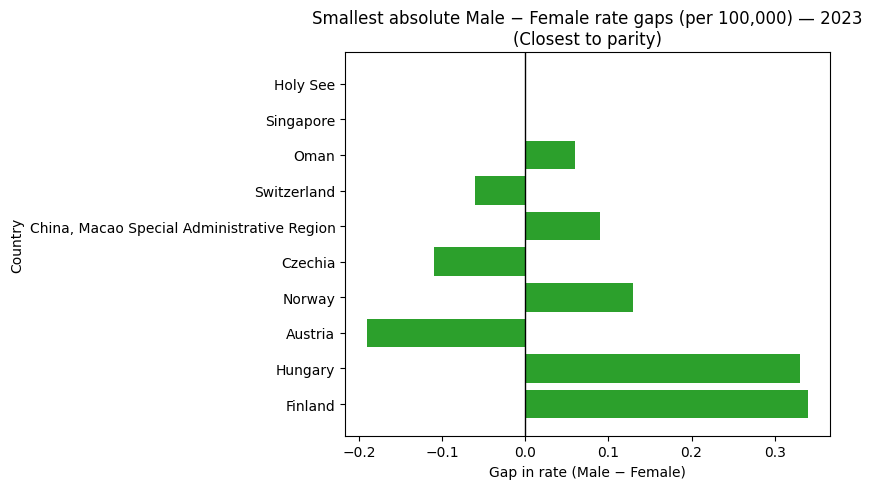

Saved figure: q6_top10_smallest_abs_gap.png


In [264]:
# Plot: smallest absolute gaps (closest to parity)
plt.figure(figsize=(8.5, 5))
y = top10_smallest_abs['Country'][::-1]
x = top10_smallest_abs['Gap_MaleMinusFemale'][::-1]
plt.barh(y, x, color='#2ca02c')
plt.axvline(0, color='black', lw=1)
plt.title(f'Smallest absolute Male − Female rate gaps (per 100,000) — {latest_year_mf}\n(Closest to parity)')
plt.xlabel('Gap in rate (Male − Female)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('q6_top10_smallest_abs_gap.png', dpi=150)
plt.show()

print("Saved figure: q6_top10_smallest_abs_gap.png")

In [265]:
# Save table for reporting (closest to parity)
top10_smallest_abs.to_csv(f'q6_top10_smallest_abs_gap_{latest_year_mf}.csv', index=False)
print("Saved table:", f'q6_top10_smallest_abs_gap_{latest_year_mf}.csv')

Saved table: q6_top10_smallest_abs_gap_2023.csv


### Top 10 most negative gaps (where Female rate > Male rate)

In [266]:
# Countries with the most negative (Female > Male) differences in the latest year
top10_most_negative = (
    mf_yr_piv.sort_values('Gap_MaleMinusFemale', ascending=True)
             .head(10)[['Country','Region','Male_rate','Female_rate','Gap_MaleMinusFemale']]
             .round(2)
)

display(top10_most_negative)

Sex,Country,Region,Male_rate,Female_rate,Gap_MaleMinusFemale
24,Latvia,Europe,2.06,2.87,-0.81
26,Malta,Europe,0.36,0.78,-0.42
3,Austria,Europe,0.78,0.97,-0.19
11,Czechia,Europe,0.71,0.82,-0.11
45,Switzerland,Europe,0.57,0.63,-0.06
40,Singapore,Asia,0.07,0.07,-0.00
18,Holy See,Europe,0.00,0.00,0.00
34,Oman,Asia,0.16,0.10,0.06
8,"China, Macao Special Administrative Region",Asia,0.61,0.52,0.09
33,Norway,Europe,0.79,0.66,0.13


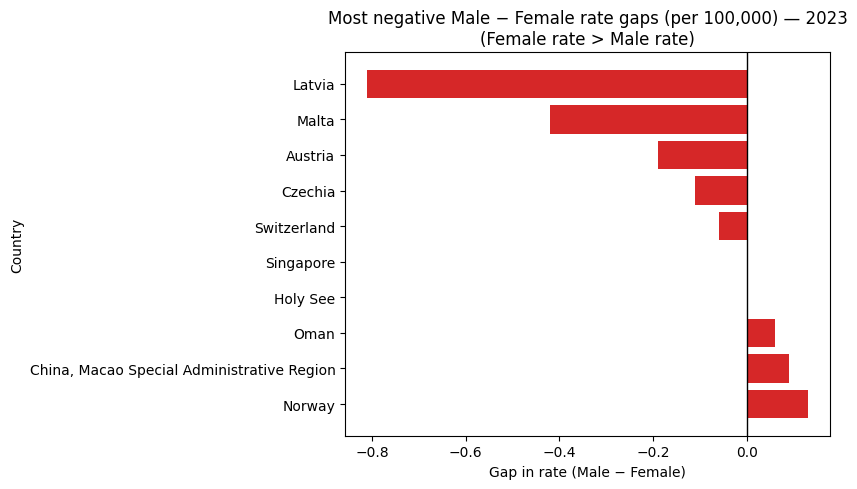

Saved figure: q6_top10_most_negative_gap.png


In [267]:
# Plot: most negative gaps (Female > Male)
plt.figure(figsize=(8.5, 5))
y = top10_most_negative['Country'][::-1]
x = top10_most_negative['Gap_MaleMinusFemale'][::-1]
plt.barh(y, x, color='#d62728')
plt.axvline(0, color='black', lw=1)
plt.title(f'Most negative Male − Female rate gaps (per 100,000) — {latest_year_mf}\n(Female rate > Male rate)')
plt.xlabel('Gap in rate (Male − Female)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('q6_top10_most_negative_gap.png', dpi=150)
plt.show()

print("Saved figure: q6_top10_most_negative_gap.png")

In [268]:
# Save table for reporting (most negative gaps)
top10_most_negative.to_csv(f'q6_top10_most_negative_gap_{latest_year_mf}.csv', index=False)
print("Saved table:", f'q6_top10_most_negative_gap_{latest_year_mf}.csv')

Saved table: q6_top10_most_negative_gap_2023.csv


### 8. For a given country, how does the proportion of homicides committed by intimate partners or family members compare to those committed by unknown perpetrators?

### Selected country = Italy

In [269]:
COUNTRY = "Italy"   # vary this to the country you want if you need to check other countries

### Build a relationship dataset and compute shares

In [270]:
# 1) Filter: by relationship to perpetrator, Sex=Total, Age=Total, Counts, chosen country
rel = cleaned[
    (cleaned['Country'] == COUNTRY) &
    (cleaned['Dimension'].astype(str).str.strip().str.lower() == 'by relationship to perpetrator') &
    (cleaned['Sex'].astype(str).str.strip().str.lower() == 'total') &
    (cleaned['Age'].astype(str).str.strip().str.lower() == 'total') &
    (cleaned['Unit of measurement'].astype(str).str.contains('count', case=False, na=False))
].copy()

# Safety: coerce numeric and clean category labels
rel['Year']   = pd.to_numeric(rel['Year'], errors='coerce')
rel['Counts'] = pd.to_numeric(rel['VALUE'], errors='coerce')
rel['Category'] = rel['Category'].astype(str).str.strip()

# 2) If no rows, stop with a helpful message
if rel.empty:
    print(f"No relationship-to-perpetrator 'Counts' data found for {COUNTRY}. "
          "Check spelling, or verify the dataset contains this disaggregation.")
else:
    # 3) Total homicides by relationship categories (denominator for proportions)
    tot_by_year = rel.groupby('Year', as_index=False)['Counts'].sum().rename(columns={'Counts':'TotalRel'})

    # 4) Collapse categories into the two groups we compare
    #    - Any label that starts with 'Intimate partner or family member' → 'Intimate/Family'
    #    - Exactly 'Perpetrator unknown to the victim'                    → 'Unknown perpetrator'
    def map_group(cat: str) -> str:
        c = str(cat).strip()
        if c.lower().startswith('intimate partner or family member'):
            return 'Intimate/Family'
        if c.lower() == 'perpetrator unknown to the victim':
            return 'Unknown perpetrator'
        return 'Other/known'

    rel['Group2'] = rel['Category'].apply(map_group)

    # 5) Sum counts per (Year x Group2), keep all relationship totals to compute shares
    grp = rel.groupby(['Year', 'Group2'], as_index=False)['Counts'].sum()

    # Pivot to columns for the two focus groups
    pivot2 = grp.pivot(index='Year', columns='Group2', values='Counts').fillna(0)

    # Merge total relationship counts to compute proportions against *total* (all relationship categories)
    pivot2 = pivot2.merge(tot_by_year.set_index('Year'), left_index=True, right_index=True, how='left')

    # Ensure columns exist even if missing in some years
    for col in ['Intimate/Family', 'Unknown perpetrator']:
        if col not in pivot2.columns:
            pivot2[col] = 0.0

    # 6) Compute shares (% of total relationship-classified homicides)
    pivot2['Share_IntimateFamily_%'] = (100 * pivot2['Intimate/Family'] / pivot2['TotalRel']).round(1)
    pivot2['Share_Unknown_%']        = (100 * pivot2['Unknown perpetrator'] / pivot2['TotalRel']).round(1)

    # Clean index for printing/plotting
    pivot2 = pivot2.reset_index().sort_values('Year')
    pivot2.head()

### Plot shares over time and in the latest year; save figures and tables

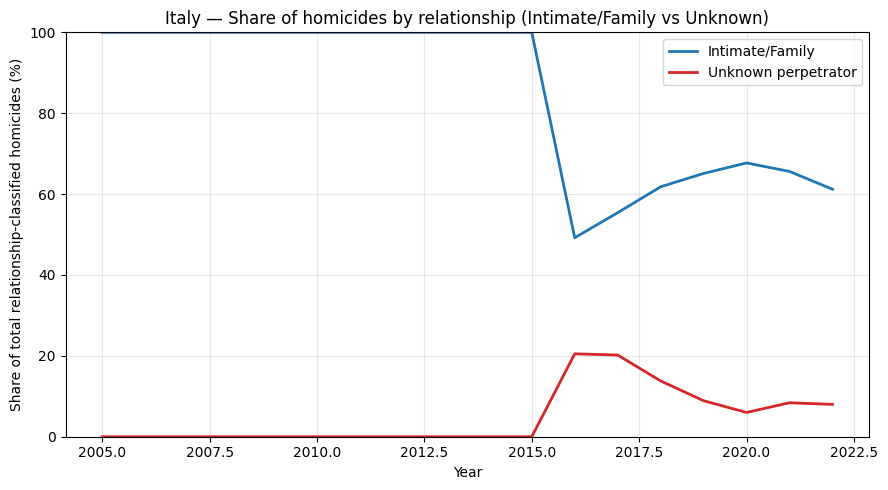

Saved figure: q8_italy_rel_shares_over_time.png


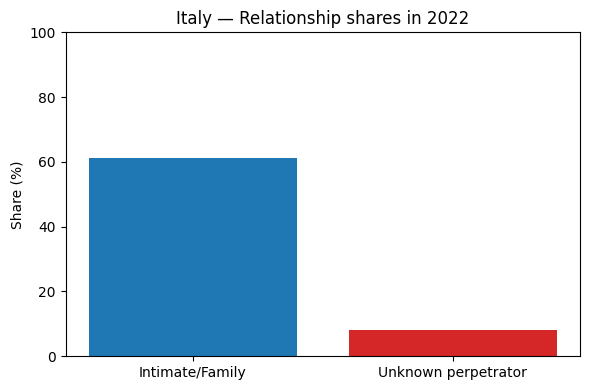

Saved figure: q8_italy_rel_latest_year.png
Saved table: q8_italy_rel_shares_over_time.csv
Saved latest-year category breakdown: q8_italy_rel_categories_2022.csv


In [271]:
if not rel.empty:
    # Pick the latest year with relationship data
    latest_rel_year = int(pivot2['Year'].max())

    # --- Line chart: shares over time ---
    try:
        plt
    except NameError:
        import matplotlib.pyplot as plt

    plt.figure(figsize=(9,5))
    plt.plot(pivot2['Year'], pivot2['Share_IntimateFamily_%'], label='Intimate/Family', color='#1f77b4', lw=2)
    plt.plot(pivot2['Year'], pivot2['Share_Unknown_%'],      label='Unknown perpetrator', color='#d62728', lw=2)
    plt.title(f"{COUNTRY} — Share of homicides by relationship (Intimate/Family vs Unknown)")
    plt.xlabel("Year"); plt.ylabel("Share of total relationship-classified homicides (%)")
    plt.ylim(0, 100); plt.grid(True, alpha=0.3); plt.legend()
    safe_country = COUNTRY.lower().replace(' ', '_')
    plt.tight_layout(); plt.savefig(f"q8_{safe_country}_rel_shares_over_time.png", dpi=150)
    plt.show()
    print("Saved figure:", f"q8_{safe_country}_rel_shares_over_time.png")

    # --- Latest year bar chart ---
    latest_row = pivot2[pivot2['Year'] == latest_rel_year][
        ['Share_IntimateFamily_%','Share_Unknown_%']
    ].iloc[0]

    plt.figure(figsize=(6,4))
    plt.bar(['Intimate/Family', 'Unknown perpetrator'],
            [latest_row['Share_IntimateFamily_%'], latest_row['Share_Unknown_%']],
            color=['#1f77b4','#d62728'])
    plt.title(f"{COUNTRY} — Relationship shares in {latest_rel_year}")
    plt.ylabel("Share (%)"); plt.ylim(0, 100)
    plt.tight_layout(); plt.savefig(f"q8_{safe_country}_rel_latest_year.png", dpi=150)
    plt.show()
    print("Saved figure:", f"q8_{safe_country}_rel_latest_year.png")

    # --- Save tidy tables for reporting ---
    out_time = pivot2[['Year','Intimate/Family','Unknown perpetrator','TotalRel',
                       'Share_IntimateFamily_%','Share_Unknown_%']].copy()
    out_time.to_csv(f"q8_{safe_country}_rel_shares_over_time.csv", index=False)
    print("Saved table:", f"q8_{safe_country}_rel_shares_over_time.csv")

    latest_table = rel[rel['Year'] == latest_rel_year].groupby('Category', as_index=False)['Counts'].sum() \
                          .sort_values('Counts', ascending=False)
    latest_table.to_csv(f"q8_{safe_country}_rel_categories_{latest_rel_year}.csv", index=False)
    print("Saved latest-year category breakdown:", f"q8_{safe_country}_rel_categories_{latest_rel_year}.csv")

## 10. What is the distribution of VALUE (counts) across all observations, and where are the outliers?

### Distribution of VALUE (Counts) across all observations & outliers

In [272]:
# Use all observations with "Counts" unit (any Dimension/Category) — answers the question literally
counts_all = cleaned[cleaned['Unit of measurement'].astype(str).str.contains('count', case=False, na=False)].copy()
counts_all['Counts'] = pd.to_numeric(counts_all['VALUE'], errors='coerce')

# Keep only numeric & non-missing counts
counts_all = counts_all.dropna(subset=['Counts'])

# Basic info for transparency
n_zero = (counts_all['Counts'] == 0).sum()
n_pos  = (counts_all['Counts']  > 0).sum()
print("Total rows (Counts):", len(counts_all), "| Zeros:", n_zero, "| >0:", n_pos)

# A "core" slice (optional) for clean region/country comparisons
core_mask = (
    (cleaned['Unit of measurement'].astype(str).str.contains('count', case=False, na=False)) &
    (cleaned['Dimension'].astype(str).str.strip().str.lower() == 'total') &
    (cleaned['Sex'].astype(str).str.strip().str.lower() == 'total') &
    (cleaned['Age'].astype(str).str.strip().str.lower() == 'total')
)
counts_core = cleaned[core_mask].copy()
counts_core['Counts'] = pd.to_numeric(counts_core['VALUE'], errors='coerce')
counts_core = counts_core.dropna(subset=['Counts'])
print("Core rows (Counts, Total/Total/Total):", len(counts_core))

Total rows (Counts): 61450 | Zeros: 11087 | >0: 50363
Core rows (Counts, Total/Total/Total): 6344


### Global summary statistics (all observations)

In [273]:
# Summary stats: all observations (heavy-tailed)
import numpy as np

vals = counts_all['Counts'].values
summary = {
    'n': int(len(vals)),
    'min': float(np.nanmin(vals)),
    'p01': float(np.nanpercentile(vals, 1)),
    'p05': float(np.nanpercentile(vals, 5)),
    'q1': float(np.nanpercentile(vals, 25)),
    'median': float(np.nanpercentile(vals, 50)),
    'q3': float(np.nanpercentile(vals, 75)),
    'p95': float(np.nanpercentile(vals, 95)),
    'p99': float(np.nanpercentile(vals, 99)),
    'max': float(np.nanmax(vals)),
    'mean': float(np.nanmean(vals)),
    'std': float(np.nanstd(vals))
}
pd.Series(summary).round(3)

n          61450.000
min            0.000
p01            0.000
p05            0.000
q1             1.000
median        12.000
q3            72.000
p95         1295.000
p99        18361.784
max       451035.633
mean        1083.746
std        12673.999
dtype: float64

### Histogram of counts (log10 scale) — all observations

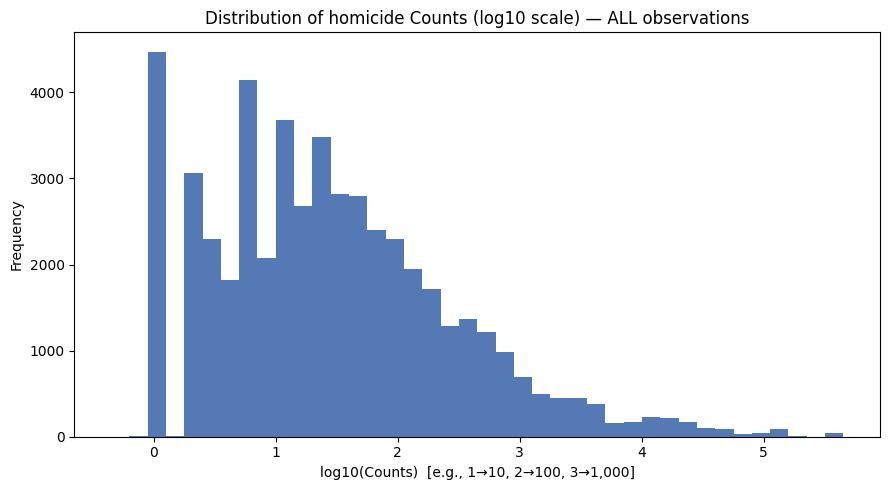

Saved figure: q10_counts_hist_log10_all.png


In [274]:
# Safe plotting guard
try:
    plt
except NameError:
    import matplotlib.pyplot as plt

# log10 histogram (exclude zeros for log scale)
pos_vals = counts_all.loc[counts_all['Counts'] > 0, 'Counts']

plt.figure(figsize=(9,5))
plt.hist(np.log10(pos_vals), bins=40, color='#4C72B0', alpha=0.95)
plt.title('Distribution of homicide Counts (log10 scale) — ALL observations')
plt.xlabel('log10(Counts)  [e.g., 1→10, 2→100, 3→1,000]')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('q10_counts_hist_log10_all.png', dpi=150)
plt.show()

print("Saved figure: q10_counts_hist_log10_all.png")

### Boxplots by Region (core slice) — avoids double‑counting

<Figure size 1000x500 with 0 Axes>

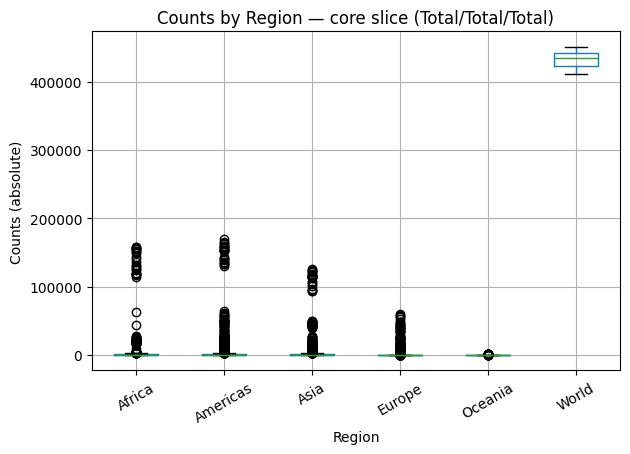

Saved figure: q10_counts_boxplot_by_region_core.png


In [275]:
# Boxplots by Region using the core slice (Total/Total/Total)
if 'Region' in counts_core.columns and not counts_core.empty:
    plt.figure(figsize=(10,5))
    counts_core.boxplot(by='Region', column='Counts', rot=30)
    plt.title('Counts by Region — core slice (Total/Total/Total)')
    plt.suptitle('')
    plt.ylabel('Counts (absolute)')
    plt.tight_layout()
    plt.savefig('q10_counts_boxplot_by_region_core.png', dpi=150)
    plt.show()
    print("Saved figure: q10_counts_boxplot_by_region_core.png")
else:
    print("No core rows with Region available; skipping Region boxplot.")

### Outlier detection (global, all observations)

In [276]:
# P99 rule — extreme high counts
p99 = np.nanpercentile(vals, 99)
extreme_high = counts_all[counts_all['Counts'] >= p99] \
    .sort_values('Counts', ascending=False) \
    [['Iso3_code','Region','Subregion','Country','Dimension','Category','Sex','Age','Year','Counts']]

extreme_high.to_csv('q10_outliers_top1pct_counts.csv', index=False)
print("Saved: q10_outliers_top1pct_counts.csv  (top 1% by Counts)")

# Tukey rule on log10(counts) — robust to skew
log_vals = np.log10(pos_vals)
Q1, Q3 = np.percentile(log_vals, [25, 75])
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR  # (rarely useful here; many small positives are expected)

# Join thresholds back to rows with Counts>0
tmp = counts_all[counts_all['Counts'] > 0].copy()
tmp['log10'] = np.log10(tmp['Counts'])

tukey_high = tmp[tmp['log10'] > upper] \
    .sort_values('Counts', ascending=False) \
    [['Iso3_code','Region','Subregion','Country','Dimension','Category','Sex','Age','Year','Counts']]
tukey_low  = tmp[tmp['log10'] < lower] \
    .sort_values('Counts', ascending=True) \
    [['Iso3_code','Region','Subregion','Country','Dimension','Category','Sex','Age','Year','Counts']]

tukey_high.to_csv('q10_outliers_tukey_high.csv', index=False)
tukey_low.to_csv('q10_outliers_tukey_low.csv', index=False)
print("Saved: q10_outliers_tukey_high.csv  (Tukey high outliers on log10)")
print("Saved: q10_outliers_tukey_low.csv   (Tukey low outliers on log10)")

Saved: q10_outliers_top1pct_counts.csv  (top 1% by Counts)
Saved: q10_outliers_tukey_high.csv  (Tukey high outliers on log10)
Saved: q10_outliers_tukey_low.csv   (Tukey low outliers on log10)


Top & bottom tables (quick view) — all observations

In [277]:
# Top 10 counts (all observations)
top25 = counts_all.sort_values('Counts', ascending=False).head(10) \
    [['Iso3_code','Region','Subregion','Country','Dimension','Category','Sex','Age','Year','Counts']]
print("Top 25 rows by Counts:")
print(top25)

# Bottom 25 positive counts (ignore zeros)
bottom25_pos = counts_all[counts_all['Counts'] > 0] \
    .sort_values('Counts', ascending=True).head(10) \
    [['Iso3_code','Region','Subregion','Country','Dimension','Category','Sex','Age','Year','Counts']]
print("\nBottom 25 positive rows by Counts:")
print(bottom25_pos)

top25.to_csv('q10_top25_counts.csv', index=False)
bottom25_pos.to_csv('q10_bottom25_positive_counts.csv', index=False)
print("\nSaved tables: q10_top25_counts.csv, q10_bottom25_positive_counts.csv")

Top 25 rows by Counts:
      Iso3_code Region Subregion Country Dimension Category    Sex    Age  \
61167     WORLD  World     World   World     Total    Total  Total  Total   
61168     WORLD  World     World   World     Total    Total  Total  Total   
61165     WORLD  World     World   World     Total    Total  Total  Total   
61163     WORLD  World     World   World     Total    Total  Total  Total   
61164     WORLD  World     World   World     Total    Total  Total  Total   
61166     WORLD  World     World   World     Total    Total  Total  Total   
61153     WORLD  World     World   World     Total    Total  Total  Total   
61152     WORLD  World     World   World     Total    Total  Total  Total   
61162     WORLD  World     World   World     Total    Total  Total  Total   
61169     WORLD  World     World   World     Total    Total  Total  Total   

       Year         Counts  
61167  2016  451035.632884  
61168  2017  450654.763354  
61165  2014  449003.525326  
61163  2012  

### Build the Counts datasets (all observations + core slice)

In [278]:
# All observations with unit containing "count"
counts_all = cleaned[cleaned['Unit of measurement'].astype(str).str.contains('count', case=False, na=False)].copy()
counts_all['Counts'] = pd.to_numeric(counts_all['VALUE'], errors='coerce')
counts_all = counts_all.dropna(subset=['Counts'])

#  for clean region comparisons: Total/Total/Total
core_mask = (
    (cleaned['Unit of measurement'].astype(str).str.contains('count', case=False, na=False)) &
    (cleaned['Dimension'].astype(str).str.strip().str.lower() == 'total') &
    (cleaned['Sex'].astype(str).str.strip().str.lower() == 'total') &
    (cleaned['Age'].astype(str).str.strip().str.lower() == 'total')
)
counts_core = cleaned[core_mask].copy()
counts_core['Counts'] = pd.to_numeric(counts_core['VALUE'], errors='coerce')
counts_core = counts_core.dropna(subset=['Counts'])

print("All-observations rows:", len(counts_all))
print("(Total/Total/Total):", len(counts_core))

All-observations rows: 61450
(Total/Total/Total): 6344


### Box plot on log10(Counts) (all observations) + Tukey outliers

Tukey fences (log10): lower=-1.303, upper=4.035
High outliers (all obs): 972 | Low outliers: 0
Saved: q10_box_outliers_all_high.csv, q10_box_outliers_all_low.csv


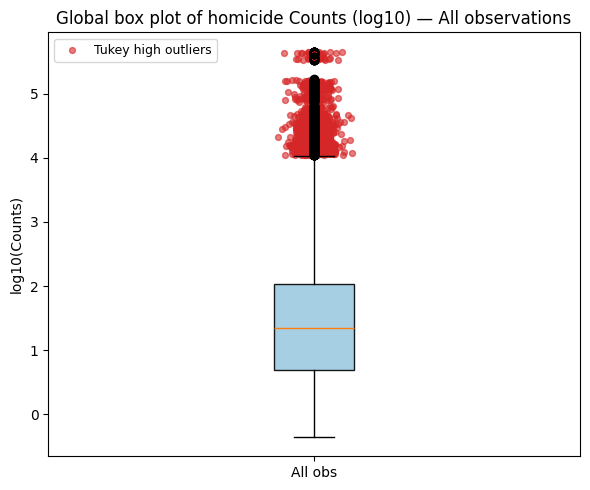

Saved figure: q10_boxplot_log10_all.png


In [279]:
# Prepare positive counts (log10 needs > 0)
import numpy as np

pos_all = counts_all[counts_all['Counts'] > 0].copy()
pos_all['log10'] = np.log10(pos_all['Counts'])

# Compute Tukey fences on log10
Q1, Q3 = np.percentile(pos_all['log10'], [25, 75])
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers (high and low on log scale)
tukey_high_all = pos_all[pos_all['log10'] > upper_fence].copy()
tukey_low_all  = pos_all[pos_all['log10'] < lower_fence].copy()

print(f"Tukey fences (log10): lower={lower_fence:.3f}, upper={upper_fence:.3f}")
print("High outliers (all obs):", len(tukey_high_all), "| Low outliers:", len(tukey_low_all))

# Save outlier rows
cols_show = ['Iso3_code','Region','Subregion','Country','Dimension','Category','Sex','Age','Year','Counts']
tukey_high_all[cols_show].sort_values('Counts', ascending=False).to_csv('q10_box_outliers_all_high.csv', index=False)
tukey_low_all[cols_show].sort_values('Counts', ascending=True ).to_csv('q10_box_outliers_all_low.csv',  index=False)
print("Saved: q10_box_outliers_all_high.csv, q10_box_outliers_all_low.csv")

# Box plot (global) on log10(Counts)
try:
    plt
except NameError:
    import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.boxplot(pos_all['log10'], vert=True, labels=['All obs'], patch_artist=True,
            boxprops=dict(facecolor='#9ecae1', alpha=0.9))
plt.ylabel('log10(Counts)')
plt.title('Global box plot of homicide Counts (log10) — All observations')

# Overlay outlier points (high) for visual emphasis
y = tukey_high_all['log10'].values
x = np.random.normal(loc=1.0, scale=0.02, size=len(y))  # jitter near the single box at x=1
plt.scatter(x, y, s=18, c='#d62728', alpha=0.6, label='Tukey high outliers')

plt.legend(loc='upper left', fontsize=9)
plt.tight_layout()
plt.savefig('q10_boxplot_log10_all.png', dpi=150)
plt.show()
print("Saved figure: q10_boxplot_log10_all.png")

### By‑Region box plots on log10(Counts) (core slice)

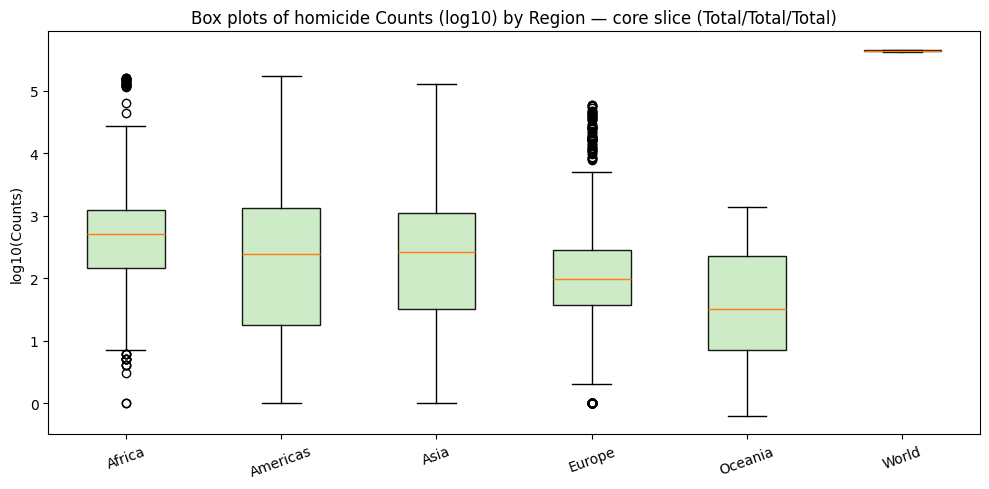

Saved figure: q10_boxplot_log10_by_region_core.png


In [280]:
# Prepare Region-level data on log10(Counts) for the core slice
core_pos = counts_core[(counts_core['Counts'] > 0) & counts_core['Region'].notna()].copy()
core_pos['log10'] = np.log10(core_pos['Counts'])

# Order regions alphabetically (or preserve UN order if you prefer)
regions = sorted(core_pos['Region'].unique().tolist())
data_by_region = [core_pos.loc[core_pos['Region'] == r, 'log10'].values for r in regions]

plt.figure(figsize=(10,5))
plt.boxplot(data_by_region, labels=regions, patch_artist=True,
            boxprops=dict(facecolor='#c7e9c0', alpha=0.9))
plt.ylabel('log10(Counts)')
plt.title('Box plots of homicide Counts (log10) by Region — core slice (Total/Total/Total)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('q10_boxplot_log10_by_region_core.png', dpi=150)
plt.show()
print("Saved figure: q10_boxplot_log10_by_region_core.png")

### Latest year by‑Region box plots (core slice)

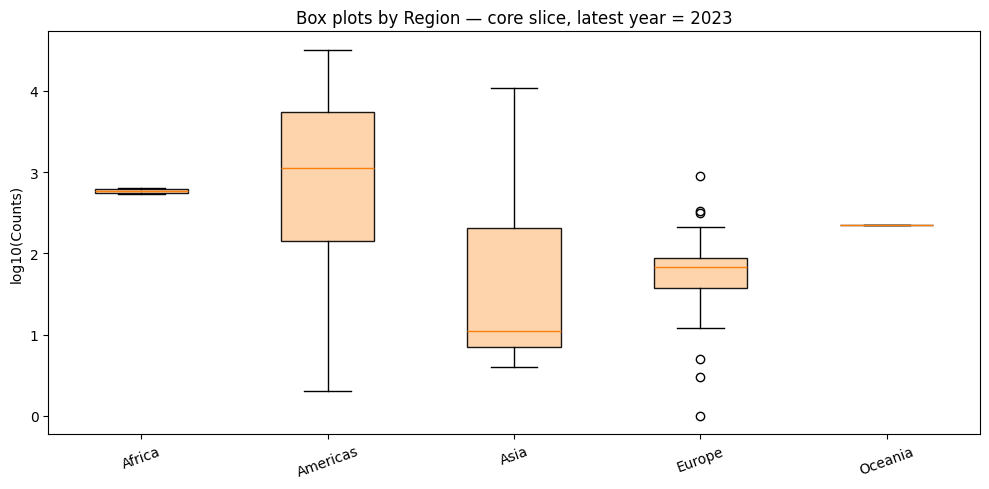

Saved figure: q10_boxplot_log10_by_region_core_2023.png


In [281]:
if not core_pos.empty:
    latest_core_year = int(core_pos['Year'].max())
    core_latest = core_pos[core_pos['Year'] == latest_core_year].copy()

    if not core_latest.empty:
        regions_latest = sorted(core_latest['Region'].unique().tolist())
        data_by_region_latest = [core_latest.loc[core_latest['Region'] == r, 'log10'].values
                                 for r in regions_latest]

        plt.figure(figsize=(10,5))
        plt.boxplot(data_by_region_latest, labels=regions_latest, patch_artist=True,
                    boxprops=dict(facecolor='#fdd0a2', alpha=0.9))
        plt.ylabel('log10(Counts)')
        plt.title(f'Box plots by Region — core slice, latest year = {latest_core_year}')
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.savefig(f'q10_boxplot_log10_by_region_core_{latest_core_year}.png', dpi=150)
        plt.show()
        print(f"Saved figure: q10_boxplot_log10_by_region_core_{latest_core_year}.png")
    else:
        print("No core rows in the latest year; skipping latest-year region box plot.")